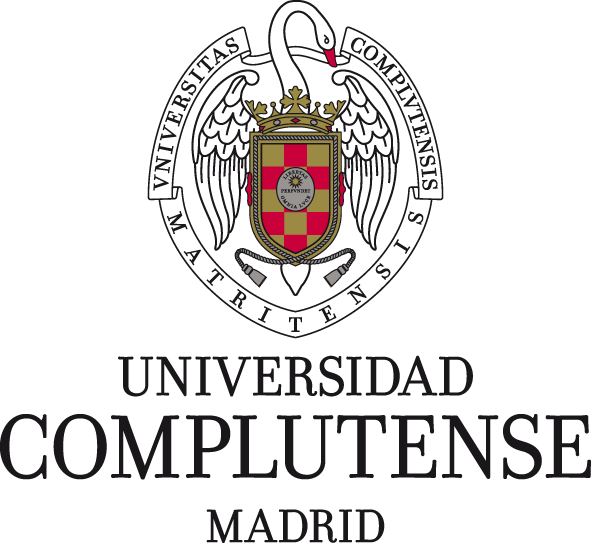

In [1]:
from IPython.display import Image

Image(filename =r'.\Images\Logo.png')

\newpage
\tableofcontents
\indent
\newpage

# Introducción

Este es un documento que tiene la intención de poder detallar el desarrollo del proyecto con una
explicación funcional acompañada del debido código, su documentación y lógica detrás de la toma
de decisiones.

Los datos han sido compartidos por O. Parr-Rud. Business Analytics Using SAS Enterprise Guide
and SAS Enterprise Miner. SAS Institute, 2014.

## Trabajo del equipo

El equipo ha desarrollado el proyecto en conjunto, sin embargo, se ha organizado su liderazgo de la siguiente manera:

1. **Eva Barrio Reyes**: Desarrollo Tarea 2 "Análisis estadístico".

2. **Mario Esteban Merchan Illescas**: Desarrollo Tarea 3 "Visualización de datos".

3. **Irving Ramírez Carrillo**: Desarrollo Tarea 4 "Recomendaciones y conclusiones".

4. **Roberto Bonilla Ibarra**: Desarrollo Tarea 1 "Análisis exploratorio de datos", Feature Engineering y Clusterización.

# Objetivos

## Objetivo principal

Definición que tipologías de clientes hay en esta empresa y cómo conseguir vender más a cada tipo.

## Objetivos secundarios

Aplicación de las siguientes técnicas:
* Análisis exploratorio de los datos.
* Detección y tratamiento de outliers y missing
* Creación de variables nuevas que consideréis necesarias para el análisis.
* Reducción de dimensiones para visualización y selección de posteriores algoritmos
* Clusterización (segmentación) de clientes.
* Analisis de asociaciones

# Librerías, Configuraciones y Lectura de Datos

Cargamos las librerías de Python necesarias:

In [2]:
import numpy as np # Para trabajo con vectores
import pandas as pd # Para manipulación y análisis de datos
from datetime import datetime as dt # Para trabajar con fechas
import seaborn as sns # Para graficar
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.compose import ColumnTransformer
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

%matplotlib inline
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

Leemos los datos de nuestro sistema, especificando la separación por `,`

In [3]:
path= "./Data/marketing_campaign.csv" # Ruta de los datos
df = pd.read_csv(path, sep=",")

Configuramos los básicos de las librerias para visualizaciones que usaremos.

In [4]:
sns.set(rc={"axes.facecolor":"#F5FBFF","figure.facecolor":"#FFFFFF",'figure.figsize':(7,5)})

# Entendimiento Inicial de Datos

Empezaremos con un entendimiento inicial de nuestros datos y cada variable

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

Usando la función de pandas info, podemos obtener el siguiente detalle de los datos :
- Existen 3 variables categóricas y 26 variables numéricas
- Hay 184 valores nulos para la variable Income

Los detalles de cada variables son los siguientes:

* **AcceptedCmp1** - 1 si el cliente aceptó la oferta en la 1ª campaña, 0 en caso contrario

* **AcceptedCmp2** - 1 si el cliente aceptó la oferta en la 2ª campaña, 0 en caso contrario

* **AcceptedCmp3** - 1 si el cliente aceptó la oferta en la 3ª campaña, 0 de lo contrario

* **AcceptedCmp4** - 1 si el cliente aceptó la oferta en la 4ª campaña, 0 en caso contrario

* **AcceptedCmp5** - 1 si el cliente aceptó la oferta en la 5ª campaña, 0 en caso contrario

* **Response (target)** - 1 si el cliente aceptó la oferta en la última campaña, 0 en caso contrario

* **Complain** - 1 si el cliente se quejó en los últimos 2 años

* **DtCustomer** - fecha de inscripción del cliente en la empresa

* **Education** - nivel de educación del cliente

* **Marital** - estado civil del cliente

* **Kidhome** - número de niños pequeños en el hogar del cliente

* **Teenhome** - número de adolescentes en el hogar del cliente

* **Income** - ingresos anuales del hogar del cliente

* **MntFishProducts** - cantidad gastada en productos de pescaderia en los últimos 2 años

* **MntMeatProducts** - cantidad gastada en productos cárnicos en los últimos 2 años

* **MntFruits** - cantidad gastada en productos de frutas en los últimos 2 años

* **MntSweetProducts** - cantidad gastada en productos dulces en los últimos 2 años

* **MntWines** - cantidad gastada en productos vitivinícolas en los últimos 2 años

* **MntGoldProds** - cantidad gastada en productos oro en los últimos 2 años

* **NumDealsPurchases** - número de compras realizadas con descuento

* **NumCatalogPurchases** - número de compras realizadas utilizando el catálogo

* **NumStorePurchases** - número de compras realizadas directamente en tiendas

* **NumWebPurchases** - número de compras realizadas a través del sitio web de la empresa

* **NumWebVisitsMonth** - número de visitas al sitio web de la empresa en el último mes

* **Recency** - número de días desde la última compra

# Tarea 1: Análisis exploratorio de datos

## Nuevas Variables

Procederemos a crear las siguientes variables:
* **Variable Spending** - Como la suma de la cantidad gastada en las 6 categorías de productos

In [6]:
list_name = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds']
df['Spending']=df.loc[:,list_name].sum(axis=1)

* **Variable Marital_Situation** - Para agrupar los diferentes estados civiles en sólo 2 categorías
integrales: Alone vs Couple

In [7]:
df['Marital_Situation']=df['Marital_Status'].replace({'Divorced':'Alone','Single':'Alone','Married':'Couple','Together':'Couple','Absurd':'Alone','Widow':'Alone','YOLO':'Alone'})

* **Variable Children** - Como el número total de niños en el hogar
* **Variable has_child** - Como una variable binaria igual a 1 si el cliente tiene uno o más hijos

In [8]:
df['Children'] = df['Kidhome'] + df['Teenhome']
df["has_child"] = np.where(df.Children> 0, 1, 0)

* **Variable not_child** - Como una variable binaria igual a 1 si el cliente no tiene hijos

In [9]:
df["not_child"] = np.where(df.Children> 0, 0, 1)

In [10]:
df['not_child'].value_counts()

0    1602
1     638
Name: not_child, dtype: int64

* **Variable Education_Grouped** - Como pregrado, grado y posgrado

In [11]:
df['Education_Grouped']=df['Education'].replace({'Basic':'undergraduate','2n Cycle':'undergraduate','Graduation':'graduate','Master':'postgraduate','PhD':'postgraduate'})

Ahora procederemos a calcular la fecha máxima de todo el dataset dada como la suma de `Recency`
y la fecha de inscripción del cliente `Dt_Customer`

In [12]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%m/%d/%Y") #Convertimos Dt_Customer a fecha
df["Year_Birth"] = pd.to_datetime(df["Year_Birth"], format="%Y") # Convertimos la variable Año a fecha para realizar operaciones
df["fecha_maxima"] = df["Dt_Customer"] + pd.to_timedelta(df["Recency"],unit="day") # Calculamos la fecha máxima registrada
print("La fecha máxima registrada " + str(df["fecha_maxima"].max()))

La fecha máxima registrada 2014-10-04 00:00:00


* **Variable Age_years** - En sustitución de la variable Year_birth (Fecha máxima - Año de
nacimiento)

$${𝐴𝑔𝑒\_𝑦𝑒𝑎𝑟𝑠} = 𝑓𝑒𝑐ℎ𝑎\_𝑚𝑎𝑥𝑖𝑚𝑎 − 𝑌𝑒𝑎𝑟\_𝐵𝑖𝑟𝑡ℎ$$

In [13]:
df["Age_years"] = df["fecha_maxima"].max() - df["Year_Birth"]
seconds_in_year = 60*60*24*365
df["Age_years"] = df["Age_years"].apply(lambda x: x.total_seconds()/seconds_in_year)

* **Variable Seniority_months** - Como el número de meses que el cliente está inscrito en la
empresa
$$𝑆𝑒𝑛𝑖𝑜𝑟𝑖𝑡𝑦\_𝑚𝑜𝑛𝑡ℎ𝑠 = 𝑓𝑒𝑐ℎ𝑎\_𝑚𝑎𝑥𝑖𝑚𝑎 − 𝐷𝑡\_𝐶𝑢𝑠𝑡𝑜𝑚𝑒𝑟$$

In [14]:
df["Seniority_months"] = df["fecha_maxima"].max() - df["Dt_Customer"]
seconds_in_month = 60*60*24*365/12
df["Seniority_months"] = df["Seniority_months"].apply(lambda x: x.total_seconds()/seconds_in_month)

* **Variable NumPurchases** - Es el número de compras totales que ha realizado el cliente

In [15]:
df["NumPurchases"] = df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"] 

* **Variable PercPromotion** - Es el porcentaje de compras con promoción que normalmente realiza la persona


In [16]:
df["PercPromotion"] = np.where(df["NumPurchases"] == 0,0,df["NumDealsPurchases"] / df["NumPurchases"])

* **Variable Family_Size** - Es el tamaño de la familia del cliente

In [17]:
df["Family_Size"] = df["Marital_Situation"].replace({"Alone": 1, "Couple":2})+ df["Children"]
df[['Marital_Situation','Children',"Family_Size"]].head(4)

Marital_Situation  Children  Family_Size
0             Alone         0            1
1             Alone         0            1
2            Couple         1            3
3            Couple         2            4

* **Variable Ticket_Size** - Es el ticket promedio por cliente

In [18]:
df["Ticket_Size"] =  np.where(df["NumPurchases"]== 0,0,df["Spending"] / df["NumPurchases"])

* **Variable Cmp_Total** - Es el total de campañas exitosas con el cliente

In [19]:
list_name = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5','Response']
df['Cmp_Total']=df.loc[:,list_name].sum(axis=1)

## Variables Segmentación

Definimos segmentos de clientes para cada producto en función de sus gastos:
1. **Nulo**: Clientes con 0 cantidad de gasto
2. **Bajo**: Clientes por debajo del 1er tercil
3. **Frecuente**: Clientes entre el 1er y 3er tercil
4. **Estrella** Clientes por encima del 3er tercil

In [20]:
list_name = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds']
for n in list_name:
    var = 'Seg_' + n
    q1 = df.loc[df[n]>0,n].quantile(.33)
    q2 = df.loc[df[n]>0,n].quantile(.66)
    df[var]=np.where(df[n]>q1, 'Frecuente','Bajo')
    df[var]=np.where(df[n]>q2, 'Estrella',df[var])
    df[var]=np.where(df[n] == 0, 'Nulo',df[var])

In [21]:
df['Seg_MntFishProducts'].value_counts()

Bajo         666
Estrella     629
Frecuente    561
Nulo         384
Name: Seg_MntFishProducts, dtype: int64

## Variables Porcentaje

Definimos porcentajes del 100% de compra a cada canal de venta, dividiendo por ejemplo, el número de ventas por catálogo entre el total de ventas, con esto conseguiremos hacer comparable el comportamiento de compra entre nuestros clientes

In [22]:
list_name = ["NumWebPurchases","NumCatalogPurchases","NumStorePurchases"]
for n in list_name:
    var = 'Porc_' + n
    df[var] = np.where(df[n] == 0, 0,df[n]/df['NumPurchases']) 

## Data Cleaning

### Variable Total Purchases

Tenemos que corroborar que no existen casos que no tengan ninguna compra registrada

In [23]:
df[df['NumPurchases']==0]['NumPurchases']

456     0
663     0
1291    0
1466    0
1826    0
1925    0
Name: NumPurchases, dtype: int64

Vemos que existen 6 casos que son importantes quitar

In [24]:
df = df[df['NumPurchases']>0]

### Variable Deal Purchases

Tenemos que corroborar que no existen casos que se registren compras con ofertas y no haya compras registradas en algún canal de venta.

In [25]:
df[df['NumDealsPurchases']>df['NumPurchases']][['NumPurchases','NumDealsPurchases']]

NumPurchases  NumDealsPurchases
1416             1                 15

Vemos que existen 1 registro con este caso, por lo tanto los quitaremos

In [26]:
df = df[df['NumDealsPurchases']<=df['NumPurchases']]

### Imputación nulos

Como sabemos la variable Income cuenta con 184 valores nulos por lo tanto remplazaremos los valores nulos, sin embargo, tenemos que entender su comportamiento de esta misma y frente a otras variables.

**KDE Plot**

La gráfica Kernel Density Estimate se usa para ver rápidamente la densidad poblacional en nuestros datos, en este caso la aplicaremos a la variable Income.


In [27]:
# Primero es importante limpiar la variable Income
df["Income"] = pd.to_numeric(df["Income"].str.replace('$','',regex=True).str.replace(',','',regex=True))

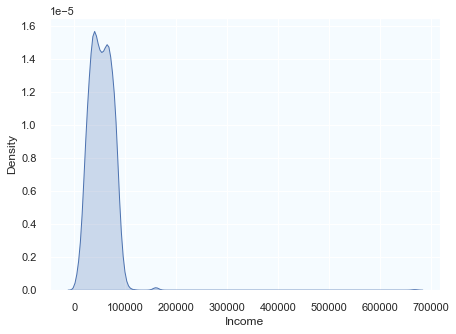

In [28]:
res = sns.kdeplot(df['Income'],fill=True);

Podemos ver que la variable tiene la mayoría de la población entre un ingreso de 0 y 100,000 dólares
anuales, sin embargo, tenemos Outliers.

In [29]:
df['Income'].describe() # Estadísticos rápidos de la variable

count      2209.000000
mean      52262.071978
std       24917.065825
min        2447.000000
25%       35416.000000
50%       51411.000000
75%       68487.000000
max      666666.000000
Name: Income, dtype: float64

**Relación entre variables**

Ahora veamos como se comporta la variable `Income` por nivel de educación

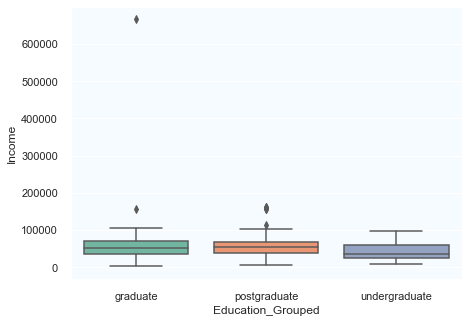

In [30]:
sns.boxplot(x=df["Education_Grouped"], y=df["Income"], palette="Set2");
plt.show()

Podemos ver que un Outlier no nos permite poder observar si las personas ganan más o menos de
acuerdo a su nivel educativo, por lo pronto lo quitaremos del gráfico:

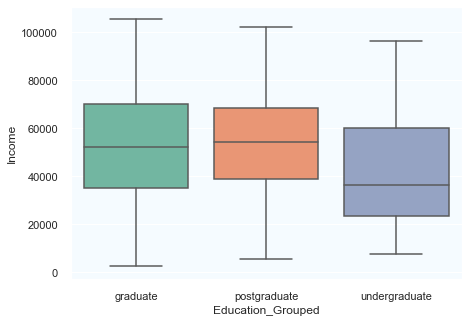

In [31]:
sns.boxplot(x=df["Education_Grouped"], y=df["Income"],palette="Set2",showfliers=False);
plt.show()

Ahora veamos si el tamaño de la Familia importa en el ingreso del cliente, pero sigamos conservando
la variable **Educación**


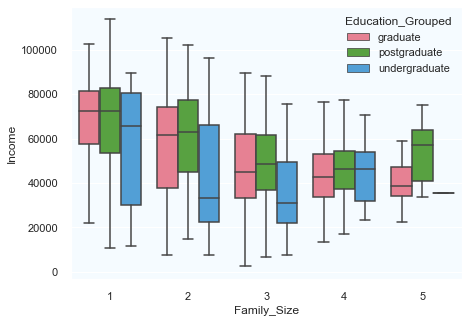

In [32]:
sns.boxplot(x=df["Family_Size"], y=df["Income"], palette="husl",hue=df["Education_Grouped"],showfliers=False);
plt.show()

Con este análisis nos es mucho más fácil poder concluir que las personas entre más pequeña sea su
familia y el nivel de estudios sea de un nivel de posgrado, mayor ingreso tendrán.

**Imputación Nulos**

Pasaremos a imputar con la mediana de ingreso por **nivel de educación y tamaño de familia.**

In [33]:
df['Income'] = df['Income'].fillna(df.groupby(['Family_Size','Education_Grouped'])['Income'].transform('mean'))
print('Número de nulos en nuestros datos: {}'.format(df.isna().sum().sum()))

Número de nulos en nuestros datos: 0


### Limpieza de Outliers

Hemos visto que la variable `Income` cuenta con Outliers muy claros en su distribución, sin embargo,
es importante realizar un análisis exhaustivo para corregir este problema.

Detección de Outliers


<Figure size 504x360 with 0 Axes>

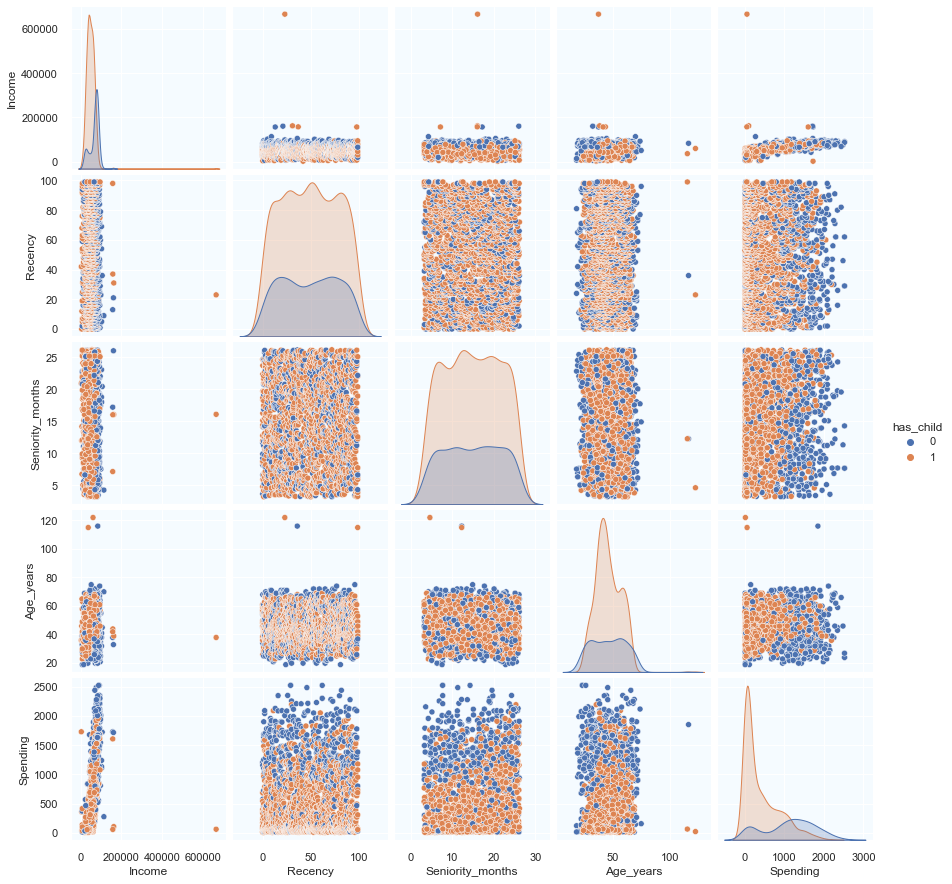

In [34]:
To_Plot = [ "Income", "Recency", "Seniority_months", "Age_years", "Spending",'has_child']
print("Detección de Outliers")
plt.figure()
sns.pairplot(df[To_Plot], hue='has_child')
plt.show();

Podemos ver que si la persona tiene un hijo o no, es sumamente importante para su capacidad económica y de compra en la tienda, haciendo a las personas sin hijos con más capacidad de compra.

También es importante notar que existe la necesidad de limpiar los valores atípicos de variable Age_years e Income.

In [35]:
df[['Income','Age_years']].describe() # Veamos sus estadísticos

Income    Age_years
count    2233.000000  2233.000000
mean    52245.267368    45.984073
std     24798.007646    11.992480
min      2447.000000    18.769863
25%     35684.000000    37.780822
50%     51369.000000    44.786301
75%     68281.000000    55.794521
max    666666.000000   121.835616

Veamos donde se localiza el quantil 99 de cada variable:

In [36]:
print("Variable Income = {0:.2f}".format(df['Income'].quantile(0.99)))
print("Variable Edad = {0:.2f}".format(df['Age_years'].quantile(0.99)))

Variable Income = 94193.92
Variable Edad = 69.80


Podemos ver que solo hace falta remplazar el máximo con el quantil 99 para que los datos tengan sentido

In [37]:
# Variable Income
value = df['Income'].quantile(0.99)
df['Income'].where(df['Income']<value, value, inplace=True)

In [38]:
# Variable Age Years
value_years = df['Age_years'].quantile(0.99)
df['Age_years'].where(df['Age_years']<value_years, value_years, inplace=True)

Ahora veamos sus estadísticos nuevamente:

In [39]:
df[['Income','Age_years']].describe() # Veamos sus estadísticos

Income    Age_years
count   2233.000000  2233.000000
mean   51809.608684    45.906536
std    20532.221017    11.705272
min     2447.000000    18.769863
25%    35684.000000    37.780822
50%    51369.000000    44.786301
75%    68281.000000    55.794521
max    94193.920000    69.802740

Podemos ver que los datos ya se han limpiado

# Tarea 2: Análisis estadístico

Está sección fue hecha en R y se adjunta un archivo html con la explicación a detalle de cada una de las preguntas.

# Tarea 3: Visualización de datos

Está sección fue hecha en R y se adjunta un archivo html con la explicación a detalle de cada una de las preguntas.

# Feature Engineering

## Selección inicial de Variables

In [40]:
df_original = df.copy()

#df_original.to_csv('marketing_data_cleaned.csv')

df_original.select_dtypes('object')


Education Marital_Status Country Marital_Situation Education_Grouped  \
0     Graduation       Divorced      SP             Alone          graduate   
1     Graduation         Single      CA             Alone          graduate   
2     Graduation        Married      US            Couple          graduate   
3     Graduation       Together     AUS            Couple          graduate   
4     Graduation         Single      SP             Alone          graduate   
...          ...            ...     ...               ...               ...   
2235         PhD       Divorced      US             Alone      postgraduate   
2236    2n Cycle        Married      SP            Couple     undergraduate   
2237  Graduation       Divorced      SP             Alone          graduate   
2238  Graduation        Married     IND            Couple          graduate   
2239         PhD        Married      CA            Couple      postgraduate   

     Seg_MntWines Seg_MntFruits Seg_MntMeatProducts Seg_MntFishProducts  \
0       Frecuente      Estrella            Estrella            Estrella   
1        Estrella          Bajo           Frecuente                Bajo   
2       Frecuente     Frecuente           Frecuente           Frecuente   
3            Bajo          Nulo                Bajo                Nulo   
4            Bajo     Frecuente           Frecuente           Frecuente   
...           ...           ...                 ...                 ...   
2235    Frecuente     Frecuente           Frecuente            Estrella   
2236         Bajo     Frecuente                Bajo                Bajo   
2237    Frecuente          Bajo           Frecuente           Frecuente   
2238    Frecuente      Estrella            Estrella            Estrella   
2239    Frecuente     Frecuente            Estrella            Estrella   

     Seg_MntSweetProducts Seg_MntGoldProds  
0                Estrella         Estrella  
1                    Nulo        Frecuente  
2                    Bajo        Frecuente  
3                    Nulo             Nulo  
4                    Nulo        Frecuente  
...                   ...              ...  
2235             Estrella         Estrella  
2236            Frecuente        Frecuente  
2237                 Bajo        Frecuente  
2238             Estrella         Estrella  
2239                 Nulo         Estrella  

[2233 rows x 11 columns]

Seleccionaremos las variables que hemos transformado y las variables que no han sido transformadas.

In [41]:
df_clustering = df[['Income','Cmp_Total','Recency','Spending', 'NumPurchases','Children', 'not_child', 'Education_Grouped','Age_years', 'Seniority_months', 'PercPromotion', 'Family_Size', 'Ticket_Size', 'Seg_MntWines', 'Seg_MntFruits', 'Seg_MntMeatProducts','Seg_MntFishProducts', 'Seg_MntSweetProducts', 'Seg_MntGoldProds','Porc_NumWebPurchases', 'Porc_NumCatalogPurchases','Porc_NumStorePurchases']].copy()

## Transformación de variables categóricas a ordinales

Transformaremos las variables **Graduated y los segmentos de cada tipo de producto** a variables ordinales

In [42]:
df_clustering["Graduated"] = df_clustering["Education_Grouped"].replace({"undergraduate": 0, "graduate":1, "postgraduate":1})
df_clustering.drop('Education_Grouped', axis=1, inplace=True)
list_name = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds']
for n in list_name:
    var = 'Seg_' + n
    df_clustering[var] = df_clustering[var].replace({"Nulo": 0, "Bajo":1, "Frecuente":2, "Estrella":3})


## Transformación de variables numéricas

Crearemos la variable **NoPromotion** el cuál es el inverso a la variable **PercPromotion**, con el objetivo de poder ver a de manera positiva a los clientes que toman menos promociones.

In [43]:
df_clustering["NoPromotion"] = 1 - df_clustering["PercPromotion"] 

## Matriz de correlación

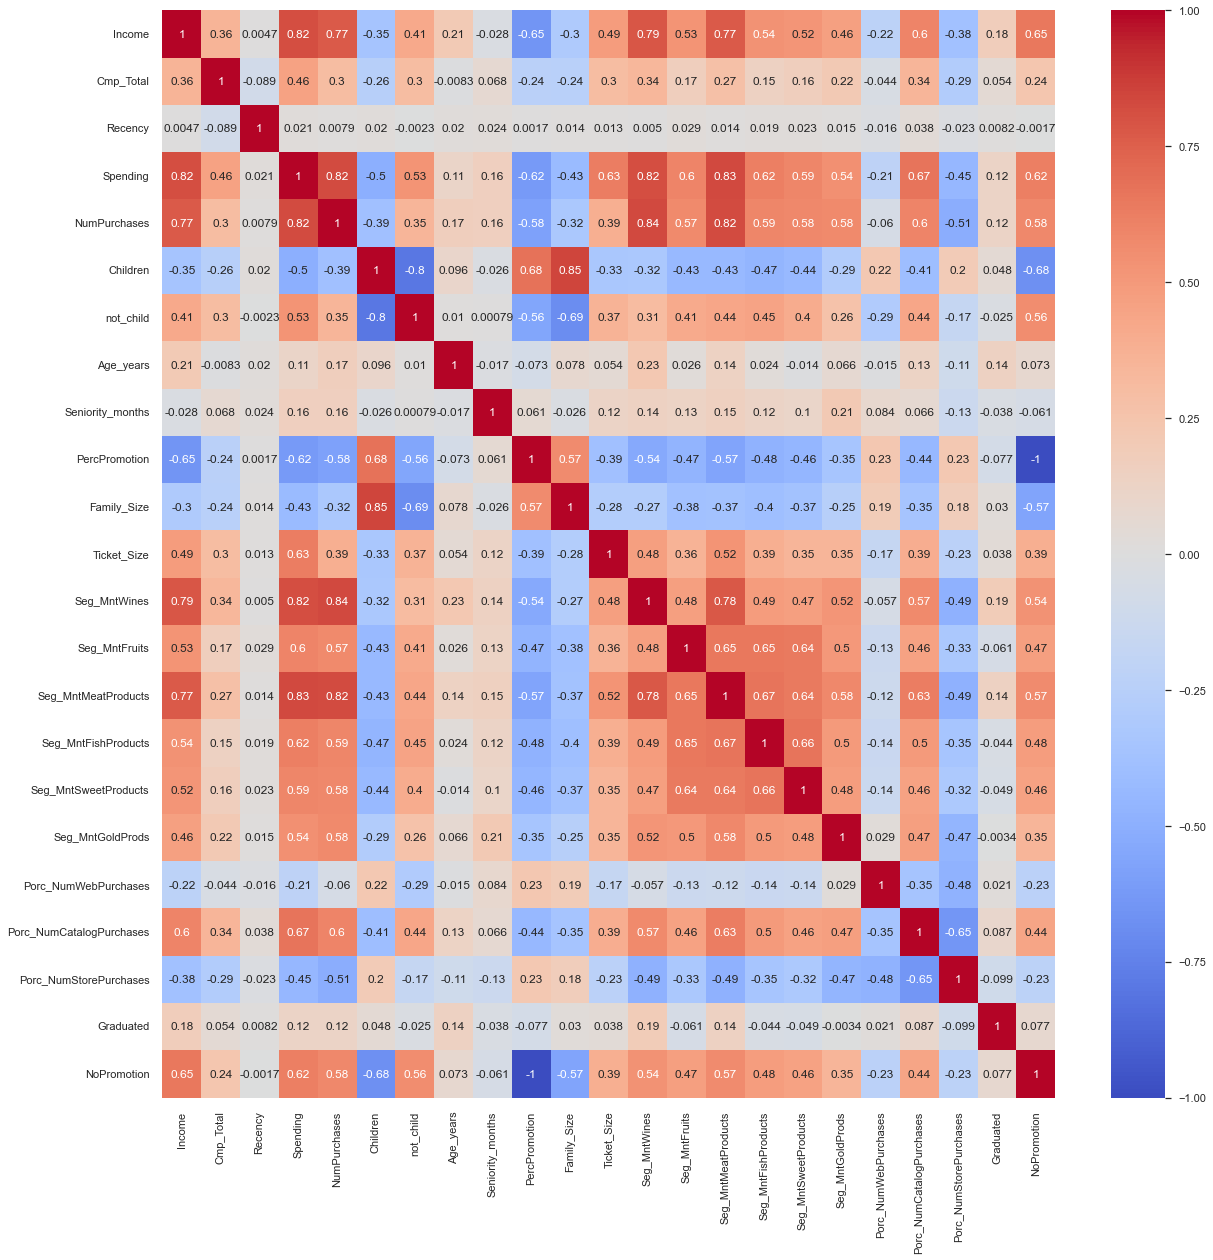

In [44]:
#correlation matrix
corrmat= df_clustering.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True,  cmap='coolwarm',center=0);

Podemos ver que existen correlaciones muy importantes entre nuestras variables:
1. La compra de vino, carne y el ingreso son sumamente correlacionadas a la cantidad de veces que compra una persona y la cantidad que gasta en la tienda.
2. Podemos ver que no hay una variable que pueda correlacionarse con el `Recency` del cliente.
3. Podemos ver que las personas que compran con promoción y cuentan con hijos son clientes que realmente gastan y compran poco en la tienda.

## Factor de Potencial de Compra

Para poder segmentar correctamente, usaremos un factor de potencial de compra como variable extra al modelo RFM, este factor estará compuesto por las siguientes variables:

* Income

* Cmp Total

* Not Child

* No_Promotion

### Normalización de datos

El primer paso es normalizar y centrar todos los datos que usaremos en el clustering por medio de la función `Standard Scaler` de pandas, lo cual lo que hace es lo siguiente:

z = (x - u) / s

"where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False"

Fuente <https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [45]:
ct = ColumnTransformer([('somename', StandardScaler(), ['Income','Cmp_Total','Recency','Spending', 'NumPurchases'])], remainder='passthrough')
scaled_ds = pd.DataFrame(ct.fit_transform(df_clustering),columns= df_clustering.columns ) # Escalando variables en el set de datos
pca_ds = scaled_ds[['Income','Cmp_Total','not_child','NoPromotion']] # Seleccionando las necesarias para el factor de potencial de compra
pca_ds.describe().T

count          mean       std       min       25%       50%  \
Income       2233.0  1.807779e-16  1.000224 -2.404692 -0.785557 -0.021464   
Cmp_Total    2233.0 -1.492362e-15  1.000224 -0.502897 -0.502897 -0.502897   
not_child    2233.0  2.834751e-01  0.450786  0.000000  0.000000  0.000000   
NoPromotion  2233.0  7.586429e-01  0.172430  0.000000  0.666667  0.800000   

                  75%       max  
Income       0.802401  2.064745  
Cmp_Total    0.618950  5.106340  
not_child    1.000000  1.000000  
NoPromotion  0.916667  1.000000

### PCA

El Análisis de Componentes Principales (PCA) es una técnica estadística utilizada para la reducción de dimensionalidad y la visualización de datos. El objetivo del PCA es encontrar las principales direcciones de variabilidad en los datos y representarlos en un subespacio de menor dimensión manteniendo la mayor cantidad de información posible. El método PCA se basa en la transformación lineal de los datos originales a una base ortogonal de vectores denominados componentes principales.

Los pasos generales del PCA son:

Centrado de los datos: Se calcula la media de cada variable y se resta a cada observación. Es importante realizar esta operación para que la varianza de cada variable sea comparables.

Cálculo de la matriz de covarianza: Se calcula la matriz de covarianza de los datos centrados. La fórmula para calcular la matriz de covarianza es:

$$\Sigma = \frac{1}{n-1} X^TX$$

donde X es la matriz de datos centrados, cuyas filas corresponden a las observaciones y las columnas a las variables.

Cálculo de los autovectores y autovalores: Se calculan los autovectores y autovalores de la matriz de covarianza. Los autovectores son los vectores que conforman la base ortogonal de los componentes principales y los autovalores son los escalares asociados a cada autovector. La fórmula para calcular los autovectores y autovalores es:
$$\Sigma v_i = \lambda_i v_i$$

Selección de los componentes principales: Se seleccionan los k componentes principales con mayores autovalores, donde k es el número de dimensiones deseado para el subespacio de menor dimensión.

Transformación de los datos: Se proyectan los datos originales sobre el subespacio de los k componentes principales utilizando la fórmula:
$$X_{proy} = XW_k$$

donde W_k es la matriz de k autovectores.

**Para construir el factor de potencial de compra, usaremos las 4 variables que hemos seleccionado usando la técnica de componentes principales, para poder quedarnos con una variable que trate de explicar la mayor varianza posible.**

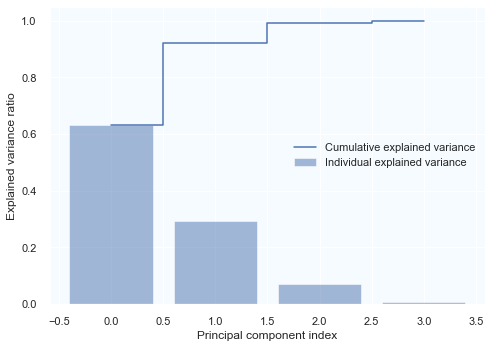

In [46]:
pca = PCA()
# Determinamos las variables a transformar
X_train_pca = pca.fit_transform(pca_ds)
# Determinamos la varianza explicada con el atributo explained_variance_ration_ 
exp_var_pca = pca.explained_variance_ratio_
# Creando la suma de varianza explicada por cada componente principañ
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
# Creando la visualización
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Podemos ver que la primera componente principal explica alrededor del 60% de la varianza en los datos.

In [47]:
# Generamos la componente principal y analizamos sus estadísticos
pca = PCA(n_components=1)
PCA_df = pd.DataFrame(pca.fit_transform(pca_ds), columns=(["potencial_de_compra"]))
PCA_df.describe().T

count          mean       std       min       25%  \
potencial_de_compra  2233.0  7.477722e-17  1.187775 -2.109119 -0.869266   

                         50%       75%       max  
potencial_de_compra -0.20003  0.518178  5.082594

Podemos ver que los resultados es una componente principal ya normalizada, ahora veamos como se comporta contra otras variables importantes de negocio y si realmente la podemos ocupar como factor de potencial de compra.

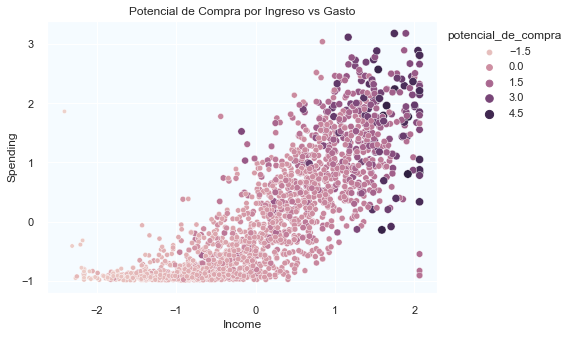

In [48]:
ax = sns.scatterplot(x=scaled_ds["Income"], y=scaled_ds["Spending"], hue=PCA_df["potencial_de_compra"], size=PCA_df["potencial_de_compra"])
ax.set_title("Potencial de Compra por Ingreso vs Gasto")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

Podemos ver que el ingreso y el gasto son dos variables sumamente correladas, y el potencial de compra hace una gran distinción entre los clientes top de la población.

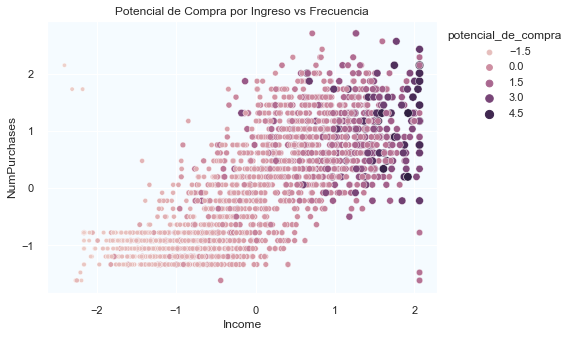

In [49]:
ax = sns.scatterplot(x=scaled_ds["Income"], y=scaled_ds["NumPurchases"], hue=PCA_df["potencial_de_compra"], size=PCA_df["potencial_de_compra"])
ax.set_title("Potencial de Compra por Ingreso vs Frecuencia")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

Se puede oservar como el potencial de compra se encuentra también present en los clientes con ingreso y frecuencias de compra más altas de la empresa.

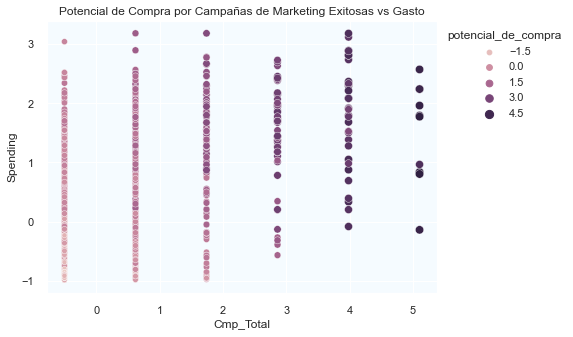

In [50]:
ax = sns.scatterplot(x=scaled_ds["Cmp_Total"], y=scaled_ds["Spending"], hue=PCA_df["potencial_de_compra"], size=PCA_df["potencial_de_compra"])
ax.set_title("Potencial de Compra por Campañas de Marketing Exitosas vs Gasto")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

Podemos ver que el potencial de compra del cliente no necesariamente son linealmente los clientes que gastan más en la empresa, si no al potencial de los cliientes con base a las variables que reducimos en una componente principal.

Ahora agregamos el potencial de compra al set de datos con las variables RFM escaladas para poder clusterizar en la siguiente sección.

In [51]:
clustering = scaled_ds[["Recency","Spending","NumPurchases"]].copy()
clustering['Potencial'] = PCA_df['potencial_de_compra']
clustering.head()

Recency  Spending  NumPurchases  Potencial
0 -1.694327  0.967142      0.198291   1.700322
1 -1.694327 -0.050813      0.616011   1.517183
2 -1.694327 -0.592172     -0.358670   0.144479
3 -1.694327 -0.990719     -1.333351  -1.065124
4 -1.694327 -0.857870     -0.915630   0.088202


# Clustering

Usaremos el modelo RFM sin separar por cuantiles, sino, normalizando las 3 variables para que estén en la misma escala y los clientes que sean estrellas se sigan separando del resto, además añadiremos la variable potencial de compra.

## Número óptimo de clusters

Para definir el número óptimo de clusters usaremos 3 medidas de evaluación de la técnica clustering, las cuales son el Silhoutte Score, Calinski-Harabasz y la distorción.


### Silhoutte Score

El Silhoutte Score es una métrica para evaluar la calidad del agrupamiento obtenido con algoritmos de clustering. 

$${s(i)} = \frac{b-a}{max(a,b)}$$

Donde:

- a es el promedio de las disimilitudes (o distancias) de la observación i con las demás observaciones del cluster al que pertenece i

- b es la distancia mínima a otro cluster que no es el mismo en el que está la observación i.
    
Para poder graficar el Silhouette Score hemos tomado el código de Scikit Learn <https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html>

TypeError: '<=' not supported between instances of 'str' and 'int'

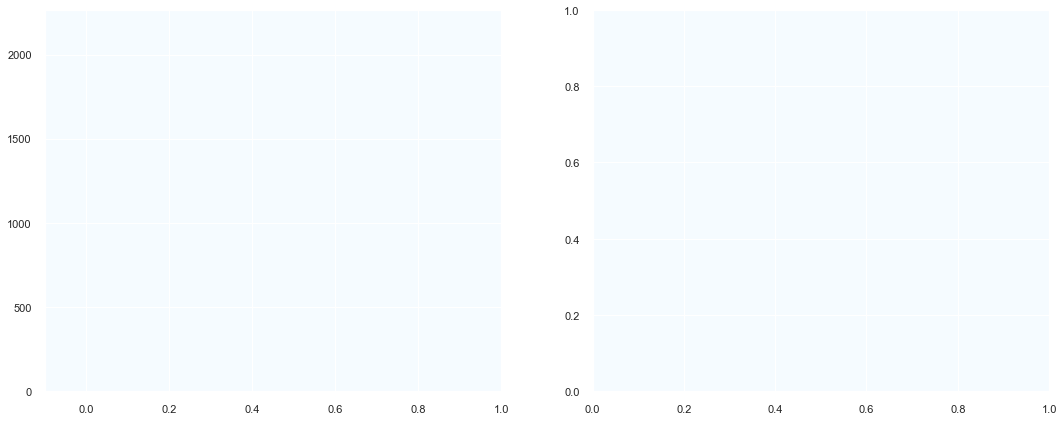

In [53]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

X= clustering.to_numpy()
range_n_clusters = [2, 3, 4, 5, 6,7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Podemos ver que en 5 clústeres nuestros datos encuentran un máximo local en el Score Silhouette además de hacer una partición bastante interesante con el grupo 1.

For n_clusters = 2 The average silhouette_score is : 0.4238776503943484
For n_clusters = 3 The average silhouette_score is : 0.3348537416373404
For n_clusters = 4 The average silhouette_score is : 0.2892862270868478
For n_clusters = 5 The average silhouette_score is : 0.31088875576553926
For n_clusters = 6 The average silhouette_score is : 0.2743519918633403
For n_clusters = 7 The average silhouette_score is : 0.2374957961793842


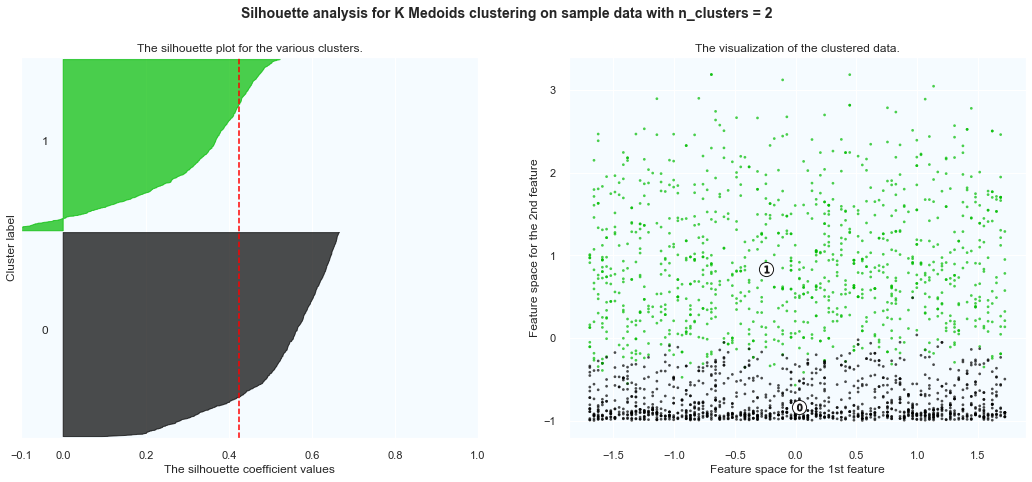

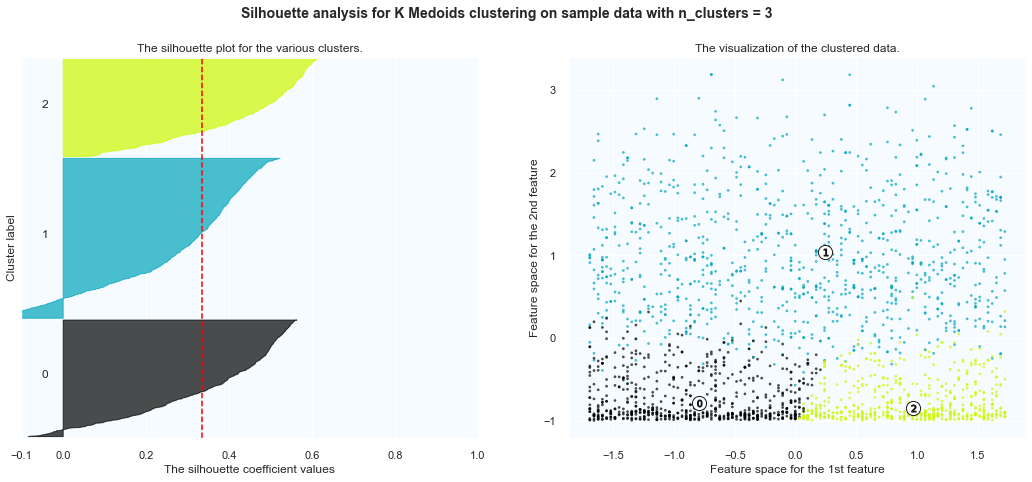

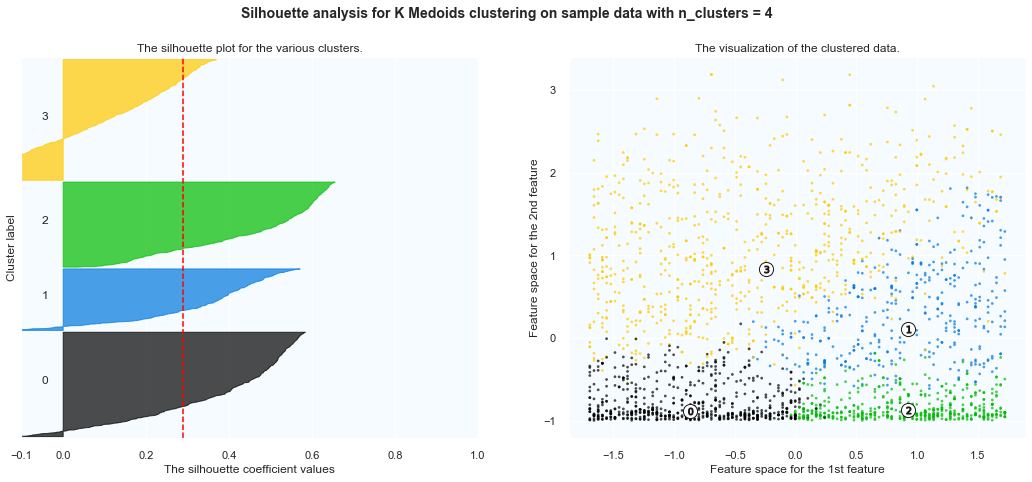

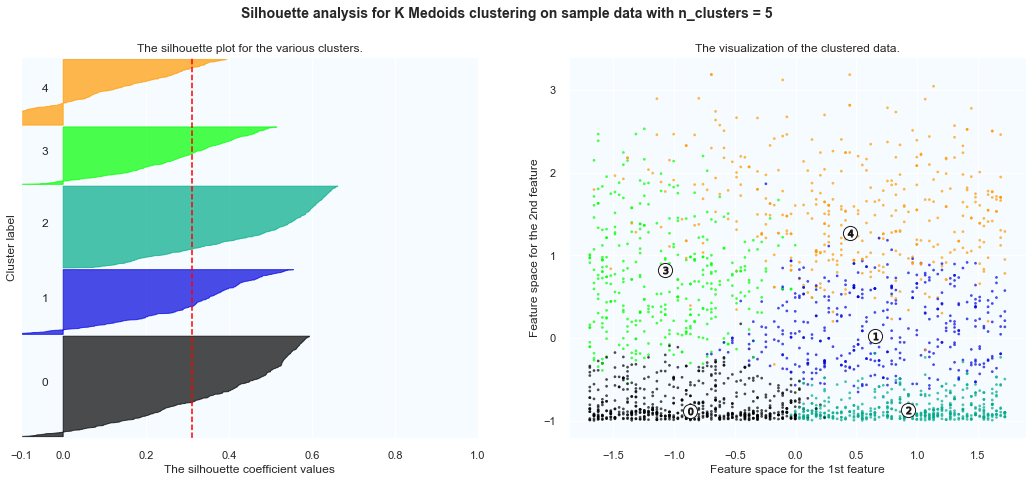

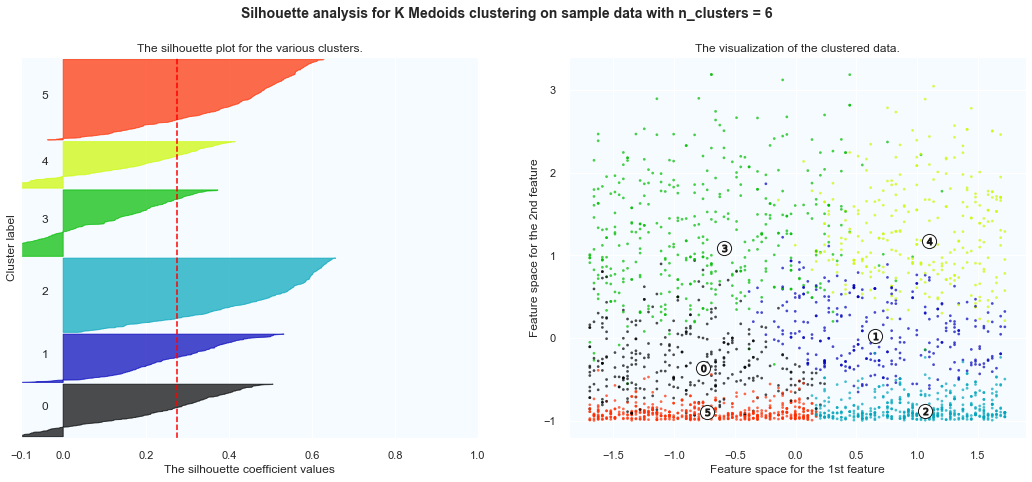

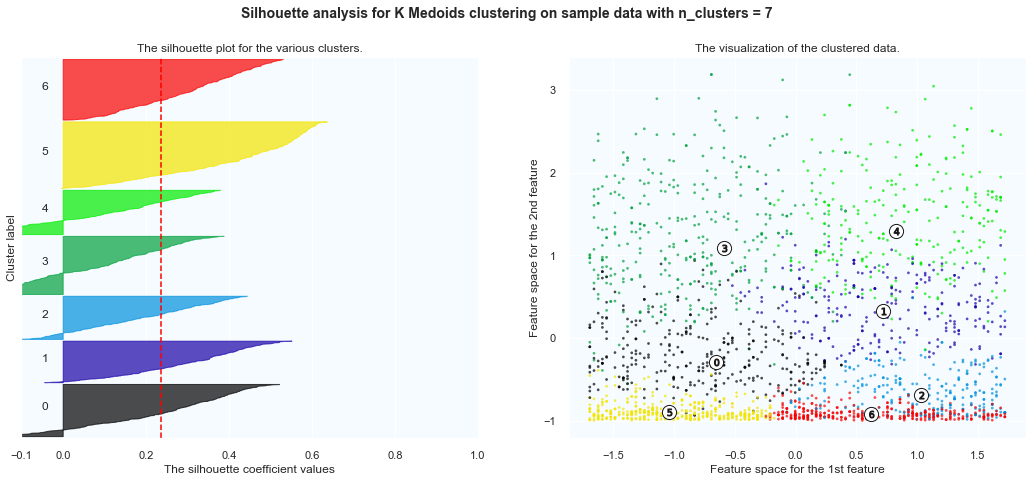

In [54]:
range_n_clusters = [2, 3, 4, 5, 6,7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMedoids(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for K Medoids clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Podemos ver que de nuevo en 5 se encuentra un máximo local que no se vuelve a presentar en números posteriores de clústeres.

For n_clusters = 2 The average silhouette_score is : 0.415019448287821
For n_clusters = 3 The average silhouette_score is : 0.3772607537837434
For n_clusters = 4 The average silhouette_score is : 0.3215271998612089
For n_clusters = 5 The average silhouette_score is : 0.3095556096976681
For n_clusters = 6 The average silhouette_score is : 0.2821042631605434
For n_clusters = 7 The average silhouette_score is : 0.2440577172125367


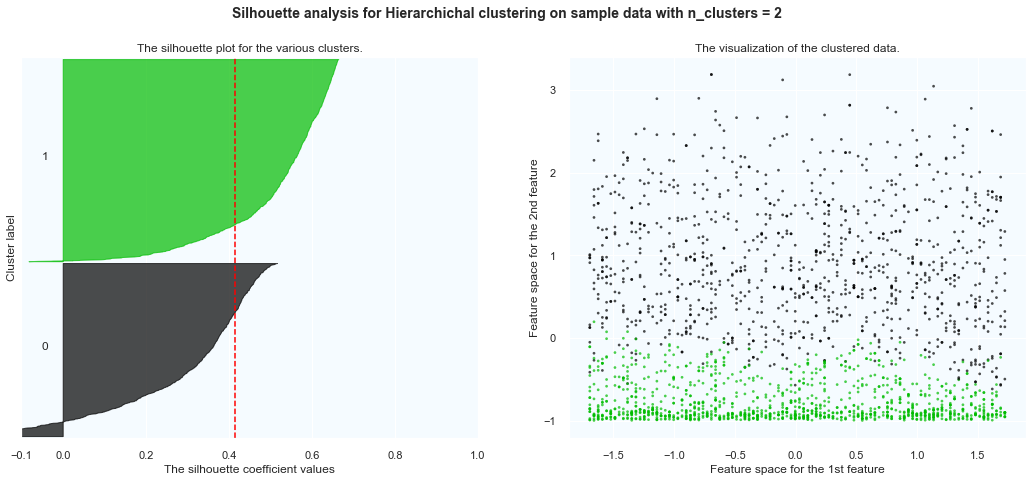

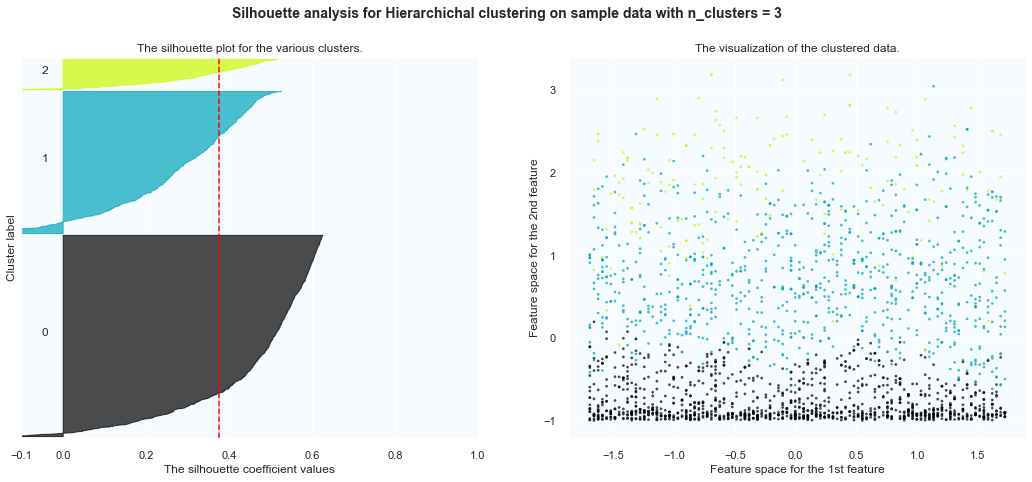

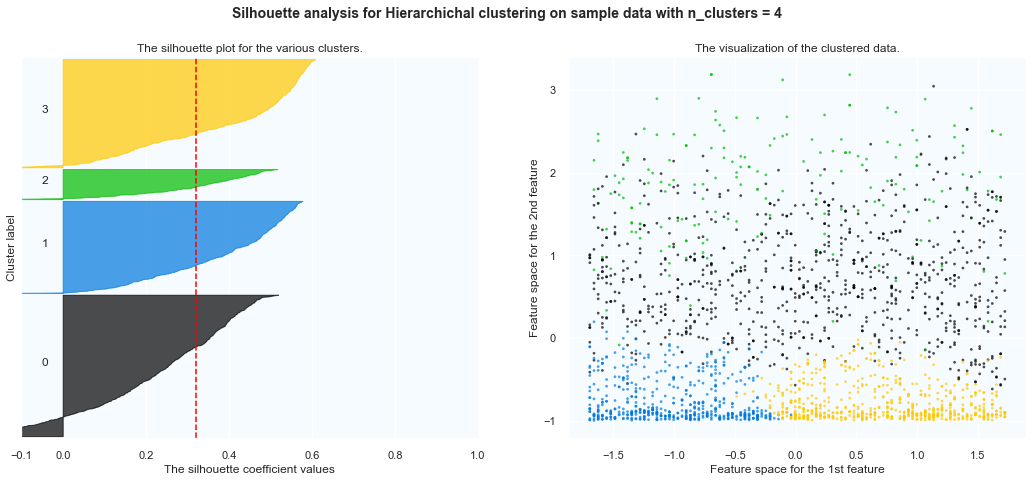

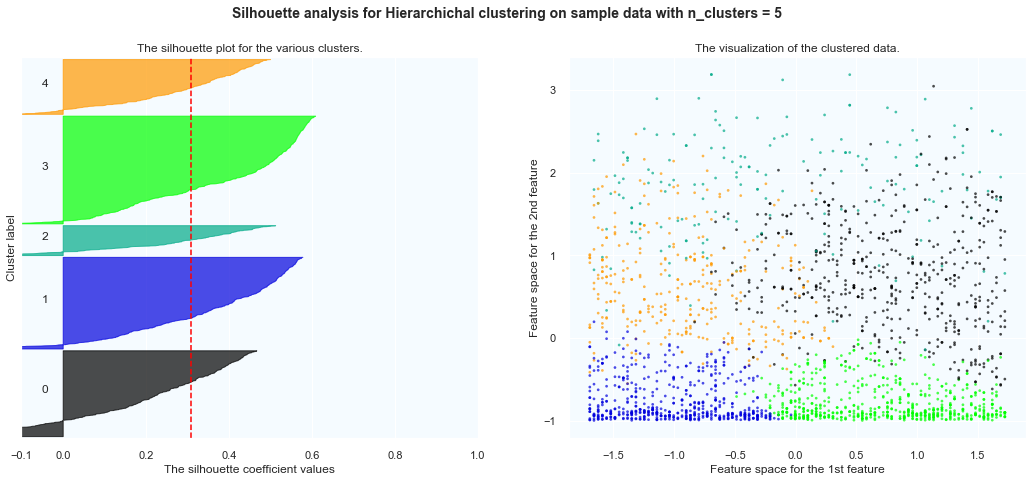

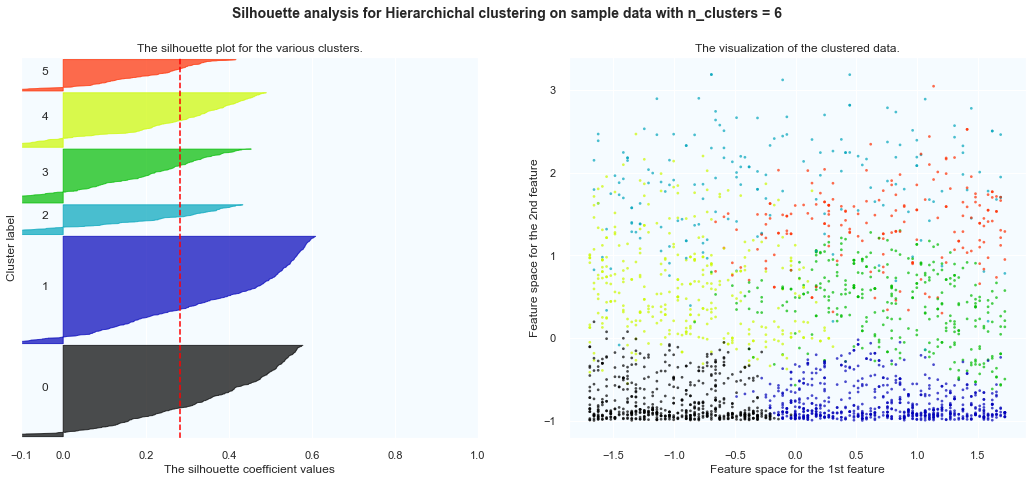

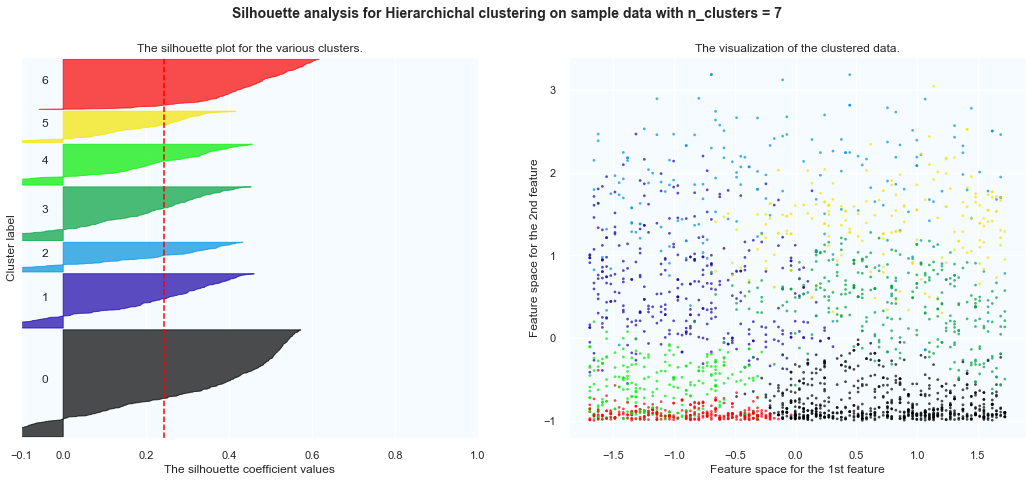

In [55]:
range_n_clusters = [2, 3, 4, 5, 6,7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for Hierarchichal clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Vemos que para el tipo de clúster Jerárquico Aglomerativo el máximo local se encuentra en 4, y es incluso un resultado mejor que el que se obtiene con K Medoids o K Means.

### Calinski-Harabasz

El índice Calinski-Harabasz se basa en la comparación de la relación ponderada entre la suma de los cuadrados (la medida de la separación del clúster) y la suma de los cuadrados dentro del clúster (la medida de cómo se empaquetan estrechamente los puntos dentro de un clúster). 

Idealmente, los clústeres deben estar bien separados, por lo que la suma entre el valor de los cuadrados debe ser grande, pero los puntos dentro de un clúster deben estar lo más cerca posible el uno del otro, dando como resultado valores más pequeños de la suma dentro del clúster de medida de cuadrados. 

Dado que el índice Calinski-Harabasz es una relación, con la suma de los cuadrados entre el numerador y la suma de cuadrados dentro del denominador, las soluciones de clúster con valores más grandes del índice corresponden a soluciones "mejores" que las soluciones de clúster con valores más pequeños. (Alteryx, 2020)

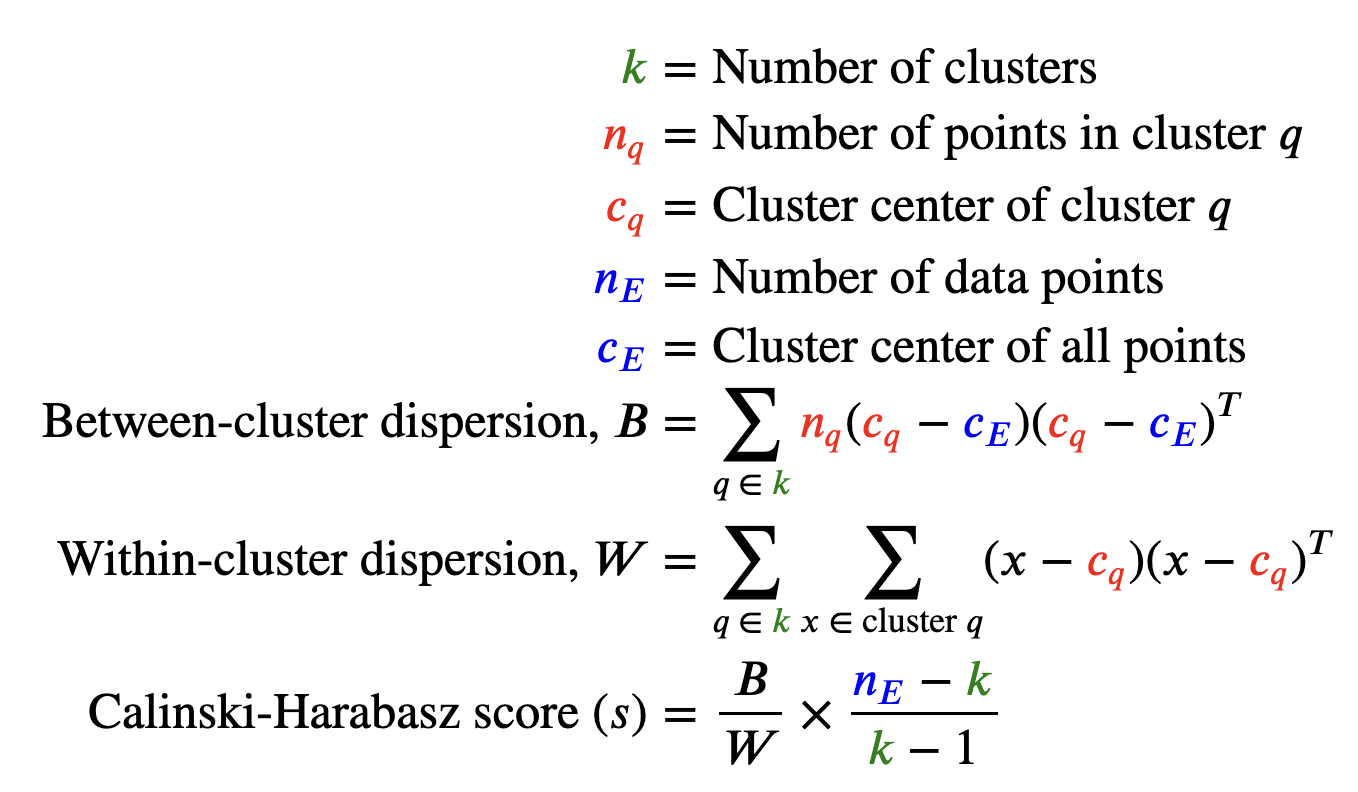

In [56]:
Image(filename =r'.\Documentos\calinski.png')

Para esto usaremos la función `KElbowVisualizer` de la librería `Yellowbrick`

Calinski Harabasz to determine the number of clusters to be formed:


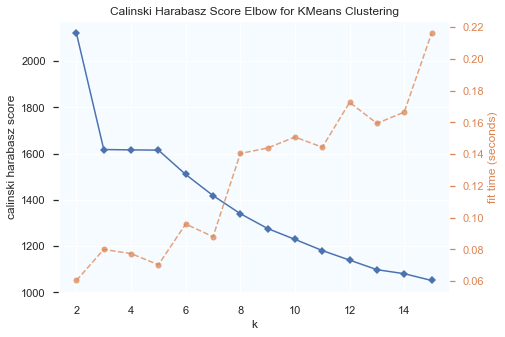

In [57]:
# Quick examination of elbow method to find numbers of clusters to make.
model = KMeans()

print('Calinski Harabasz to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(model, k=15,metric='calinski_harabasz', timings= True, locate_elbow='False')
Elbow_M.fit(clustering)
Elbow_M.poof();

Calinski Harabasz to determine the number of clusters to be formed:


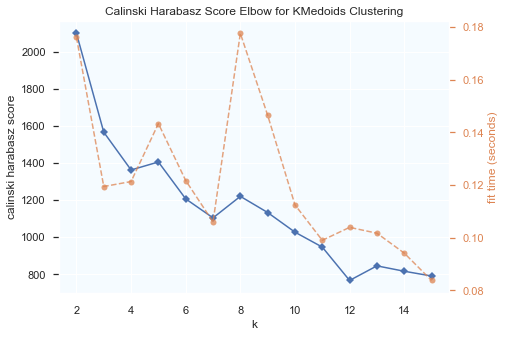

In [58]:
# Quick examination of elbow method to find numbers of clusters to make.
model = KMedoids()

print('Calinski Harabasz to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(model, k=15,metric='calinski_harabasz', timings= True, locate_elbow='False')
Elbow_M.fit(clustering)
Elbow_M.poof();


Calinski Harabasz to determine the number of clusters to be formed:


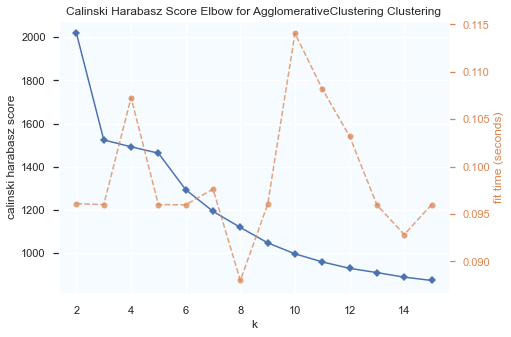

In [59]:
# Quick examination of elbow method to find numbers of clusters to make.
model = AgglomerativeClustering()

print('Calinski Harabasz to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(model, k=15,metric='calinski_harabasz', timings= True, locate_elbow='False')
Elbow_M.fit(clustering)
Elbow_M.poof();


### Distorción (Elbow)

La medida de distorsión se utiliza para evaluar la calidad de un agrupamiento o clusterización. Se refiere a la suma de las distancias al cuadrado entre cada punto de datos y el centro del cluster al que pertenece. A menor valor de distorsión, mejor es el agrupamiento ya que significa que los puntos de un cluster están más cerca del centroide del cluster.

La fórmula para calcular la distorsión es:

$$J = \sum_{i=1}^{n} (x_i - \mu_{c_i})^2$$

donde:

* J es la distorsión

* x_i es el punto de datos

* $\mu_{c_i}$ es el centroide del cluster al que pertenece el punto de datos i

* n es el número de puntos de datos

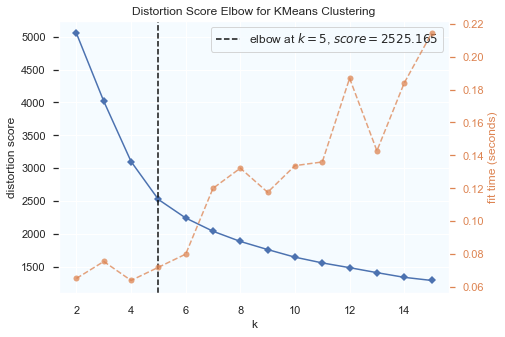

In [60]:
# Quick examination of elbow method to find numbers of clusters to make.
model = KMeans()
Elbow_M = KElbowVisualizer(model, k=15)
Elbow_M.fit(clustering)
Elbow_M.show();

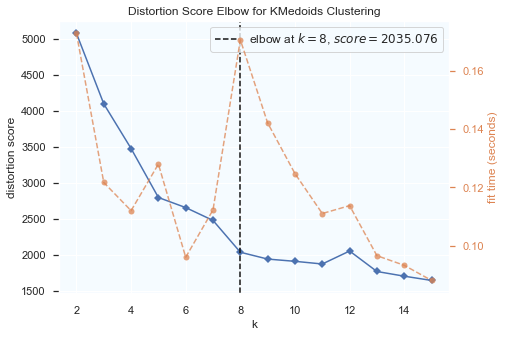

In [61]:
model = KMedoids()
Elbow_M = KElbowVisualizer(model, k=15)
Elbow_M.fit(clustering)
Elbow_M.show();

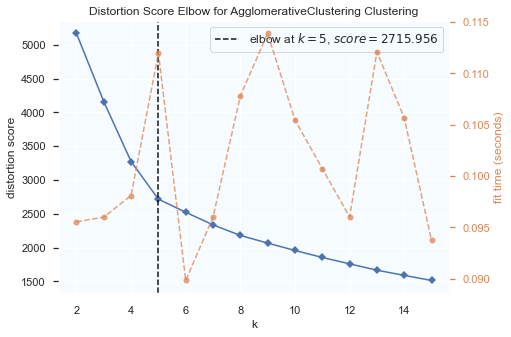

In [62]:
model = AgglomerativeClustering()
Elbow_M = KElbowVisualizer(model, k=15)
Elbow_M.fit(clustering)
Elbow_M.show();

## Modelos de clusterización

Al terminar la evaluación del mejor número de clústers y método de clusterización, hemos visto que existen dos casos que hacen sentido analizar:

1. K Means con 5 clústers.

2. Clúster Jerárquico Aglomerativo con 4 clústers.


### K Means

Primero comencemos con el algoritmo K Means:



El método K-Means es un algoritmo de aprendizaje automático no supervisado utilizado para la clusterización o agrupamiento de datos. El objetivo del algoritmo es particionar un conjunto de n puntos de datos en k clusters o grupos, donde cada cluster es representado por su centroide o vector medio.

El algoritmo se inicia asignando aleatoriamente k puntos de datos como centroides iniciales. Luego, se asigna cada punto de datos al cluster cuyo centroide es más cercano. Se utiliza la siguiente fórmula para calcular la distancia entre un punto de datos y un centroide:

$$d(x_i,\mu_j)=\left| x_i-\mu_j \right|^2$$

donde:

* x_i es el punto de datos

* $\mu_j$ es el centroide del cluster j

La fórmula para asignar cada punto de datos al cluster cuyo centroide es más cercano es:

$$c_i=argmin_{j=1}^{k} d(x_i,\mu_j)$$

donde:

* $c_i$ es el cluster al que pertenece el punto de datos i

Una vez asignados todos los puntos de datos a un cluster, se recalculan los centroides de cada cluster como el vector medio de los puntos de datos asignados al cluster. La fórmula para calcular el nuevo centroide del cluster j es:

$$\mu_j=\frac{1}{|S_j|} \sum_{i=1}^{n} x_i[c_i=j]$$

donde:

* $S_j$ es el conjunto de puntos de datos asignados al cluster j

* $|S_j|$ es el número de puntos de datos asignados al cluster j

Este proceso se repite iterativamente hasta que los centroides de los clusters ya no cambian.

In [63]:
pal = ["#682F2F","#B9C0C9", "#D6B2B1", "#9F8A78","#F3AB60"] 
sns.set(rc={"axes.facecolor":"#FFFFFF","figure.facecolor":"#FFFFFF"})

km5 = KMeans(n_clusters=5).fit(clustering)
clustering['Labels_Kmeans'] = km5.labels_

Ya hemos generado la clusterización, ahora evaluemos los resultados:

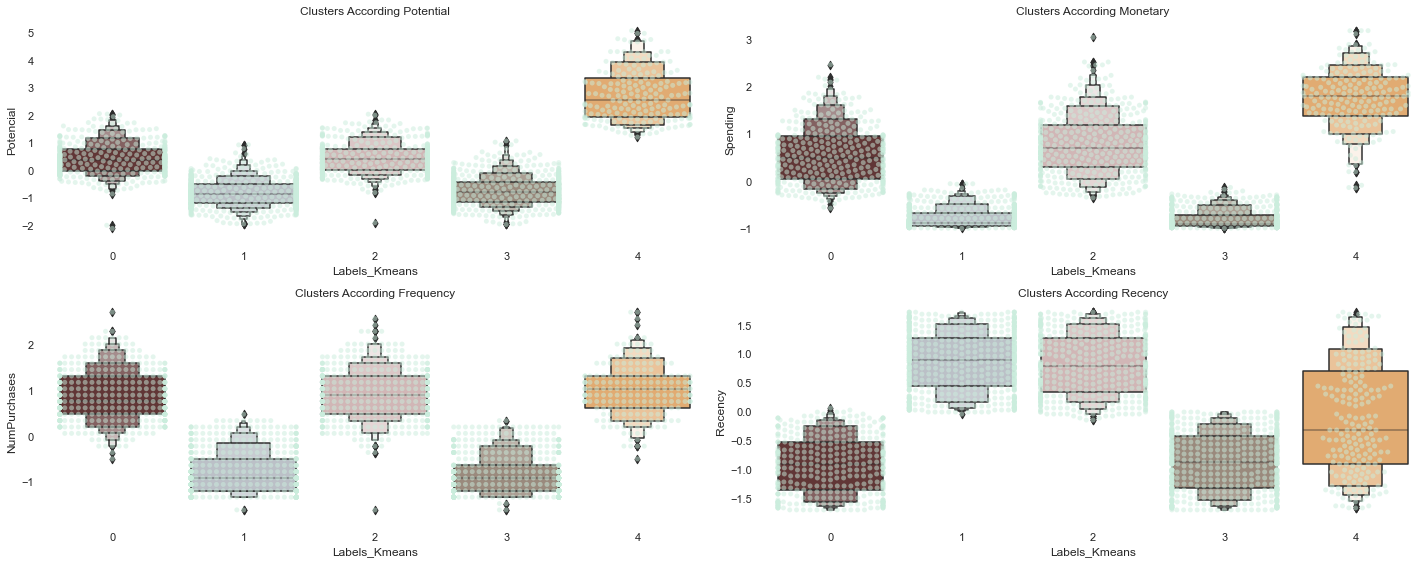

In [64]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(221)
pl = sns.swarmplot(x='Labels_Kmeans', y='Potencial', data=clustering, ax=ax, color= "#CBEDDD", alpha=0.5 )
pl = sns.boxenplot(x='Labels_Kmeans', y='Potencial', data=clustering, ax=ax, palette=pal) 
ax.set_title('Clusters According Potential')

ax = fig.add_subplot(222)
pl = sns.swarmplot(x='Labels_Kmeans', y='Spending', data=clustering, ax=ax, color= "#CBEDDD", alpha=0.5 )
pl = sns.boxenplot(x='Labels_Kmeans', y='Spending', data=clustering, ax=ax, palette=pal) 
ax.set_title('Clusters According Monetary')

ax = fig.add_subplot(223)
pl = sns.swarmplot(x='Labels_Kmeans', y='NumPurchases', data=clustering, ax=ax, color= "#CBEDDD", alpha=0.5 )
pl = sns.boxenplot(x='Labels_Kmeans', y='NumPurchases', data=clustering, ax=ax, palette=pal) 
ax.set_title('Clusters According Frequency')

ax = fig.add_subplot(224)
pl = sns.swarmplot(x='Labels_Kmeans', y='Recency', data=clustering, ax=ax, color= "#CBEDDD", alpha=0.5 )
pl = sns.boxenplot(x='Labels_Kmeans', y='Recency', data=clustering, ax=ax, palette=pal) 
ax.set_title('Clusters According Recency')

fig.tight_layout() 
plt.show()

Parecen formarse 5 grupos muy particulares:

* El clúster "0" son clientes frecuentes, que no dejan de ir a la tienda y que gastan una buena cantidad de dinero, sin embargo, en su potenciald de compra ante alguna campaña que deje dinero en la tienda no es el  más alto.

* El clúster "1" son clientes que tienen un potencial bajo. su gasto es bajo, su frecuencia también y no han ido recientemente a la tienda, por lo tanto, son clientes que costarán más trabajo recuperar que la ganancia potencial que pueden traer al negocio.

* El clúster "2" son clientes muy parecidos al cluster 0 salvo que su recencia es alta, afectando el potencial de ellos.

* El clúster "3" son clientes con bajo consumo, baja frecuencia, sin embargo, su recencia es baja por lo tanto han recurrido hace poco tiempo al comercio.

* El clúster "4" son el grupo de clientes que tiene un potencial muy alto de compra (muy probable que nos compren en alguna campaña), tienen un ingreso y gasto espectacular, son frecuentes en sus compras y lo irregular que tienen es que su recencia es muy variante.

Ahora veamos los estadísticos rapidamente:

In [65]:
clustering[['Recency','Labels_Kmeans','Spending','NumPurchases']].groupby('Labels_Kmeans').describe().T

Labels_Kmeans                0           1           2           3           4
Recency      count  391.000000  597.000000  458.000000  584.000000  203.000000
             mean    -0.916830    0.866840    0.813063   -0.868433   -0.119415
             std      0.497931    0.509632    0.525888    0.496903    0.964234
             min     -1.694327   -0.037455   -0.141010   -1.694327   -1.659809
             25%     -1.349146    0.445799    0.342245   -1.314628   -0.900409
             50%     -0.900409    0.894535    0.790981   -0.865891   -0.313601
             75%     -0.520710    1.274235    1.274235   -0.417155    0.704685
             max      0.066099    1.722971    1.722971   -0.002937    1.722971
Spending     count  391.000000  597.000000  458.000000  584.000000  203.000000
             mean     0.554431   -0.776044    0.780226   -0.803672    1.766093
             std      0.607751    0.219346    0.632419    0.197440    0.651941
             min     -0.568923   -0.995701   -0.349723   -0.995701   -0.140486
             25%      0.051315   -0.935919    0.309955   -0.942561    1.382295
             50%      0.497189   -0.877797    0.707257   -0.894403    1.797448
             75%      0.948045   -0.660257    1.192985   -0.719209    2.205958
             max      2.465014   -0.050813    3.042907   -0.130522    3.184059
NumPurchases count  391.000000  597.000000  458.000000  584.000000  203.000000
             mean     0.878823   -0.783620    0.908781   -0.845772    0.994635
             std      0.573194    0.451528    0.559172    0.427284    0.582812
             min     -0.497910   -1.611831   -1.611831   -1.611831   -0.497910
             25%      0.476771   -1.194111    0.476771   -1.194111    0.616011
             50%      0.755252   -0.915630    0.894492   -0.915630    1.033732
             75%      1.312212   -0.497910    1.312212   -0.637150    1.312212
             max      2.704614    0.476771    2.565374    0.337531    2.704614

Vemos que la desviación estándar del clúster 4 es altísima, prácticamente se encuentra distribuido por toda la variable.

### Clúster Jerárquico

El método de clusterización jerárquica aglomerativo es un algoritmo de clusterización que se basa en la idea de ir agrupando los puntos de datos de manera incremental hasta formar un único cluster que engloba a todos los puntos de datos. Este algoritmo utiliza una técnica de enlace, que define cómo se combinan los clusters en cada iteración. El método jerárquico aglomerativo se divide en dos fases:

1. **Fase de construcción del dendrograma** 

Cada punto de datos se considera como un cluster individual y se va agrupando de manera incremental hasta formar un único cluster. En cada iteración se combinan los dos clusters más cercanos según la técnica de enlace utilizada. La distancia entre dos clusters se puede calcular utilizando una de las siguientes fórmulas:

Enlace simple: La distancia entre dos clusters se calcula como la distancia mínima entre cualquier par de puntos, uno perteneciente a cada cluster. La fórmula para calcular la distancia es:
$$d(C_i, C_j) = min_{x \in C_i, y \in C_j} d(x, y)$$

Enlace completo: La distancia entre dos clusters se calcula como la distancia máxima entre cualquier par de puntos, uno perteneciente a cada cluster. La fórmula para calcular la distancia es:
$$d(C_i, C_j) = max_{x \in C_i, y \in C_j} d(x, y)$$

Enlace medio: La distancia entre dos clusters se calcula como la distancia promedio entre todos los pares de puntos, uno perteneciente a cada cluster. La fórmula para calcular la distancia es:
$$d(C_i, C_j) = \frac{1}{|C_i||C_j|}\sum_{x \in C_i}\sum_{y \in C_j} d(x, y)$$

donde:

C_i y C_j son los clusters

d(x, y) es la distancia entre dos puntos de datos x e y

2. **Fase de selección del número de clusters**

Una vez construido el dendrograma, se selecciona el número de clusters deseado cortando el dendrograma en un cierto nivel. Esta selección se puede realizar utilizando un criterio de corte, como el método Elbow o Silhouette.

Ahora hagamos la segmentación por medio del método jerárquico aglomerativo con 4 clústers (número de clusters y silhouette score más alto):

In [66]:
kj4 = AgglomerativeClustering(n_clusters=4).fit(clustering)

clustering['Labels_Jerarquico'] = kj4.labels_

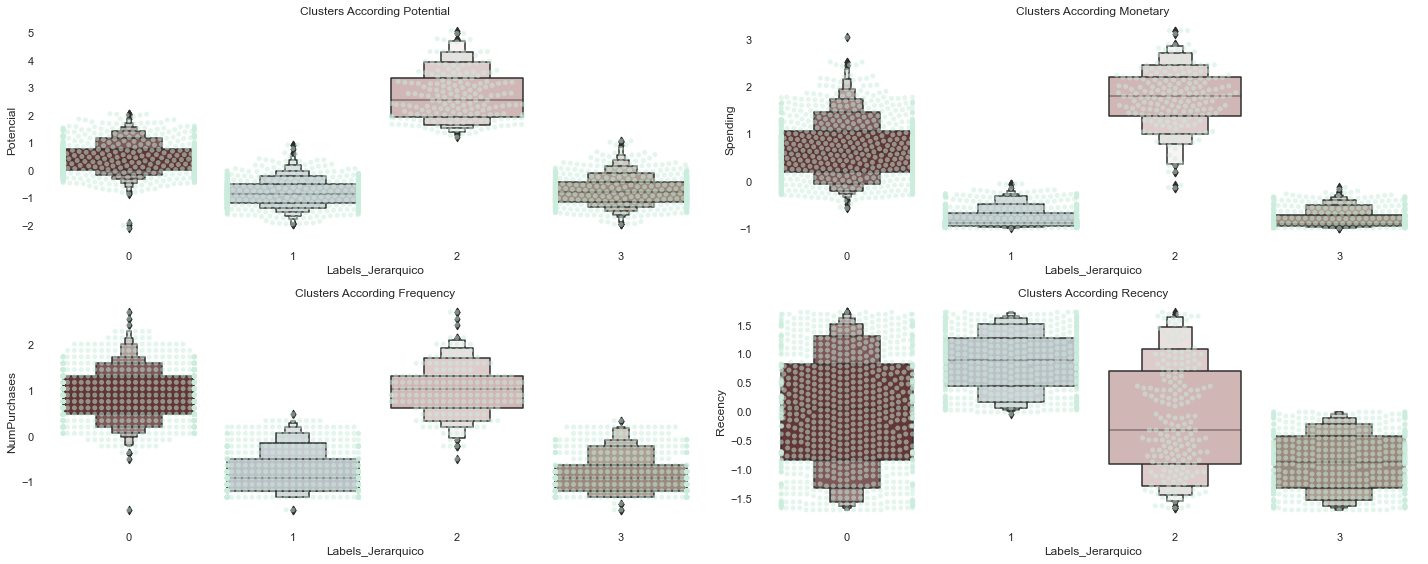

In [67]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(221)
pl = sns.swarmplot(x='Labels_Jerarquico', y='Potencial', data=clustering, ax=ax, color= "#CBEDDD", alpha=0.5 )
pl = sns.boxenplot(x='Labels_Jerarquico', y='Potencial', data=clustering, ax=ax, palette=pal) 
ax.set_title('Clusters According Potential')

ax = fig.add_subplot(222)
pl = sns.swarmplot(x='Labels_Jerarquico', y='Spending', data=clustering, ax=ax, color= "#CBEDDD", alpha=0.5 )
pl = sns.boxenplot(x='Labels_Jerarquico', y='Spending', data=clustering, ax=ax, palette=pal) 
ax.set_title('Clusters According Monetary')

ax = fig.add_subplot(223)
pl = sns.swarmplot(x='Labels_Jerarquico', y='NumPurchases', data=clustering, ax=ax, color= "#CBEDDD", alpha=0.5 )
pl = sns.boxenplot(x='Labels_Jerarquico', y='NumPurchases', data=clustering, ax=ax, palette=pal) 
ax.set_title('Clusters According Frequency')

ax = fig.add_subplot(224)
pl = sns.swarmplot(x='Labels_Jerarquico', y='Recency', data=clustering, ax=ax, color= "#CBEDDD", alpha=0.5 )
pl = sns.boxenplot(x='Labels_Jerarquico', y='Recency', data=clustering, ax=ax, palette=pal) 
ax.set_title('Clusters According Recency')

fig.tight_layout() 
plt.show()

Vemos que nos separa esta vez con 4 clusters. Lo que diferencia al cluster `0` y `2` es el potencial de compra, sin embargo, no ha podido separar la variable recencia entre estos dos, esto es porque hizo falta otra agrupación que pudiera separar el clúster `0`en donde parece haber la mayoría de clientes de la segmentación.

Ahora veamos sus métricas rápidamente:

In [68]:
clustering[['Recency','Labels_Jerarquico','Spending','NumPurchases']].groupby('Labels_Jerarquico').describe().T

Labels_Jerarquico            0           1           2           3
Recency      count  849.000000  597.000000  203.000000  584.000000
             mean     0.016375    0.866840   -0.119415   -0.868433
             std      1.003702    0.509632    0.964234    0.496903
             min     -1.694327   -0.037455   -1.659809   -1.694327
             25%     -0.831373    0.445799   -0.900409   -1.314628
             50%      0.066099    0.894535   -0.313601   -0.865891
             75%      0.825499    1.274235    0.704685   -0.417155
             max      1.722971    1.722971    1.722971   -0.002937
Spending     count  849.000000  597.000000  203.000000  584.000000
             mean     0.676238   -0.776044    1.766093   -0.803672
             std      0.630947    0.219346    0.651941    0.197440
             min     -0.568923   -0.995701   -0.140486   -0.995701
             25%      0.193297   -0.935919    1.382295   -0.942561
             50%      0.620074   -0.877797    1.797448   -0.894403
             75%      1.071761   -0.660257    2.205958   -0.719209
             max      3.042907   -0.050813    3.184059   -0.130522
NumPurchases count  849.000000  597.000000  203.000000  584.000000
             mean     0.894984   -0.783620    0.994635   -0.845772
             std      0.565535    0.451528    0.582812    0.427284
             min     -1.611831   -1.611831   -0.497910   -1.611831
             25%      0.476771   -1.194111    0.616011   -1.194111
             50%      0.894492   -0.915630    1.033732   -0.915630
             75%      1.312212   -0.497910    1.312212   -0.637150
             max      2.704614    0.476771    2.704614    0.337531

Podemos ver que las desviaciones estándar que los datos se encuentran mucho más dispersos entre las variables,  sobre todo de clientes que son muy importantes para el negocio, como lo son los del clúster `0`, además de que este mismo clúster tiene tantos clientes (38% aproximadamente) que se pierde el enfoque de clientes estrellas y se generalizan sus propiedades.

**Por lo mencionado anteriormente, vemos favorable proceder con 5 clúster y usando el método K-Means**

In [69]:
# Asignando columnas a dataset original
df_clustering['Cluster'] = km5.labels_
df_clustering['Potencial'] =PCA_df["potencial_de_compra"].tolist()

## RFM discretización y score

### Construcción escala RFM

Antes de perfilar los clústeres asignaremos en escala del 1 al 5 los resultados de cada variable de RFM y el potencial de compra, recordando que el caso de la variable `Recency` entre menor sea es mejor:

In [70]:
# Creando grupos por quartiles para variables RFM y potencial de compra. 
r_labels = range(5, 0, -1)
labels = range(1, 6)
df_clustering['Monetary_bins'] = pd.cut(df_clustering.Spending, bins=5,labels=labels).astype('int')
df_clustering['Frequency_bins'] = pd.cut(df_clustering.NumPurchases, bins=5,labels=labels).astype('int')
df_clustering['Recency_bins'] = pd.cut(df_clustering.Recency, bins=5,labels=r_labels).astype('int')
df_clustering['Potencial_bins'] = pd.cut(df_clustering.Potencial, bins=5,labels=labels).astype('int')


In [71]:
# Uniendo variables RFM
def join_rfm(x): return str(x['Monetary_bins']) + str(x['Frequency_bins']) + str(x['Recency_bins'])
df_clustering['RFM_Segment'] = df_clustering.apply(join_rfm, axis=1)

# Calculando el Score RFM
df_clustering['RFM_Score'] = df_clustering[['Recency_bins','Frequency_bins','Monetary_bins']].mean(axis=1)

In [72]:
df_clustering[['Recency_bins','Frequency_bins','Monetary_bins','RFM_Score']].head()

Recency_bins  Frequency_bins  Monetary_bins  RFM_Score
0             5               3              3   3.666667
1             5               3              2   3.333333
2             5               2              1   2.666667
3             5               1              1   2.333333
4             5               1              1   2.333333

# Tarea 4: Recomendaciones y conclusiones

Para poder dar recomendaciones concretas al negocio, procederemos a perfilar cada uno de los clústers junto con recomendaciones para incrementar las ventas y aumentar la lealtad del cliente:

## Perfilamiento clústers

### Distribución clientes

Veamos la distribución de los clientes en nuestros clústers

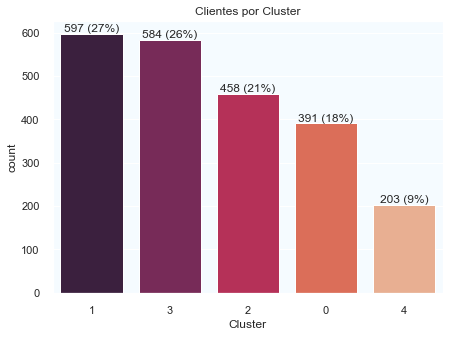

In [73]:
sns.set(rc={"axes.facecolor":"#F5FBFF","figure.facecolor":"#FFFFFF",'figure.figsize':(7,5)})
ax = sns.countplot(x=df_clustering['Cluster'],
                   order=df_clustering['Cluster'].value_counts(ascending=False).index,palette= 'rocket');
        
abs_values = df_clustering['Cluster'].value_counts(ascending=False)
rel_values = df_clustering['Cluster'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)
ax.set_title('Clientes por Cluster')
plt.show()

Vemos que los clústers 1 y 3 constituyen más del 50% de la cantidad de clientes en la empresa, estos dos grupos son los más bajos en consumo y frecuencia.

### Gasto acumulado
Ahora veamos su comportamiento con base a la suma del gasto total del cada clúster:

In [74]:
# Creamos la tabla para graficar
result = df_clustering.groupby(["Cluster"])['Spending'].aggregate(np.sum).reset_index().sort_values('Spending', ascending=False)
result['perc'] = result.Spending / result.Spending.sum() * 100
result

Cluster  Spending       perc
2        2    493468  36.370846
0        0    368115  27.131757
4        4    339237  25.003317
1        1     83744   6.172315
3        3     72204   5.321765

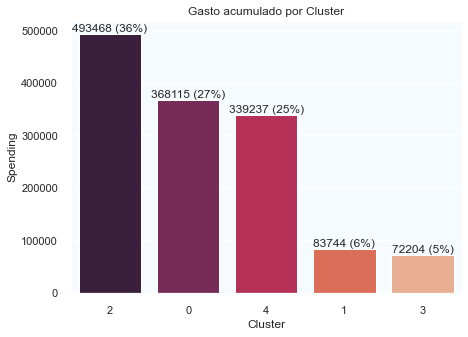

In [75]:
# Vemos el gráfico
ax = sns.barplot(x=result['Cluster'],y=result['Spending'],order=result['Cluster'],palette= 'rocket');
abs_values = result['Spending'].tolist()
rel_values = result['perc'].tolist()
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
lbls
ax.bar_label(container=ax.containers[0], labels=lbls)
ax.set_title('Gasto acumulado por Cluster')
plt.show()

El clúster 3 y 1 los cuáles cuentan con el 53% de los clientes totales, solo representa el 11% del del ingreso, sin duda estos grupo cuenta con clientes que tienen un consumo y frecuencia muy baja y va a ser todo un reto su transformación para el negocio.

### Ticket promedio

Ahora veamos el gasto promedio por ticket

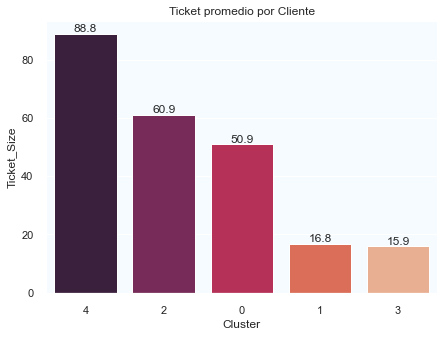

In [76]:
result = df_clustering.groupby(["Cluster"])['Ticket_Size'].aggregate(np.mean).reset_index().sort_values('Ticket_Size', ascending=False)
ax = sns.barplot(x=result['Cluster'],y=result['Ticket_Size'],order=result['Cluster'],palette= 'rocket');
lbls = result['Ticket_Size'].round(1).tolist()
ax.bar_label(container=ax.containers[0], labels=lbls)
ax.set_title('Ticket promedio por Cliente')
plt.show()

Vemos que prácticamente se ha invertido el orden con la distribución, nuestros clientes en el clúster 4 son las estrellas cada vez que compran algo en el negocio.

### Gasto Promedio por Cliente

Ahora veamos el gasto promedio por cliente de cada clúster

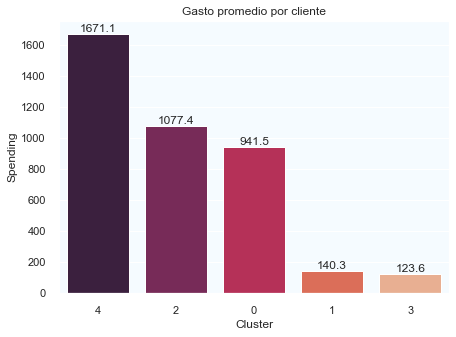

In [115]:
result = df_clustering.groupby(["Cluster"])['Spending'].aggregate(np.mean).reset_index().sort_values('Spending', ascending=False)
ax = sns.barplot(x=result['Cluster'],y=result['Spending'],order=result['Cluster'],palette= 'rocket');
lbls = result['Spending'].round(1).tolist()
ax.bar_label(container=ax.containers[0], labels=lbls)
ax.set_title('Gasto promedio por cliente')
plt.show()

Podemos ver que el comportamiento es muy similar al ticket de compra, teniendo al cliente del grupo 4 más de 11 veces más gasto que el grupo 1 o 3.

### Variable hijos

Ahora veamos la variable `not_child` que prácticamente nos dice si nuestros clientes cuentan o no con hijos:

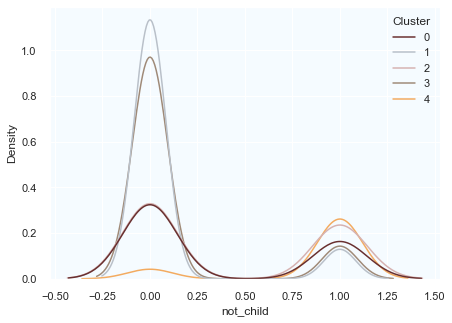

In [78]:
plt.figure()
sns.kdeplot(x=df_clustering["not_child"],  hue =df_clustering["Cluster"], palette=pal)
plt.show();

Vemos que los clústers más bajos en dinero para el negocio son los que en su mayoría cuentan con niños.

### Comportamiento a campañas

Ahora veamos su comportamiento conforme a las campañas exitosas que se han tenido:

In [ ]:
plt.figure()
pl = sns.boxplot(x='Cluster', y='Spending', data=df_clustering, palette=pal,showfliers=False) 
pl.set_title('Clusters Boxplot de acuerdo a las campañas exitosas')
plt.show()


Podemos ver que la variable `Potencial de compra` ha ayudado a poder separar las personas que están atentas a las campañas de la empresa y tienen un muy alto nivel económico.

### Variables RFM y Potencial de Compra

Primero veamos la distribución conforme al **RFM score**

In [ ]:
plt.figure()
pl = sns.boxplot(x='Cluster', y='RFM_Score', data=df_clustering, palette=pal) 
pl.set_title('Clusters Boxplot de acuerdo al RFM_Score')
plt.show()


Podemos ver que los clientes mejor posicionados de acuerdo al RFM Score son los del clúster 0, 2 y 4, teniendo a los del grupo 4 como mejor posicionados.

Para poder perfilar de mejor manera a cada clúster veamos su distribución con cada variable del RFM discretizada y su potencial de compra:

In [ ]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(221)
pl = sns.boxplot(x='Cluster', y='Potencial_bins', data=df_clustering, ax=ax, palette=pal) 
ax.set_title('Clusters According Potential')

ax = fig.add_subplot(222)
pl = sns.boxplot(x='Cluster', y='Monetary_bins', data=df_clustering, ax=ax, palette=pal) 
ax.set_title('Clusters According Monetary')

ax = fig.add_subplot(223)
pl = sns.boxplot(x='Cluster', y='Frequency_bins', data=df_clustering, ax=ax, palette=pal) 
ax.set_title('Clusters According Frequency')

ax = fig.add_subplot(224)
pl = sns.boxplot(x='Cluster', y='Recency_bins', data=df_clustering, ax=ax, palette=pal) 
ax.set_title('Clusters According Recency')

fig.tight_layout() 
plt.show()

Podemos ver que el potencial da resultados muy similares al RFM Score y que la diferencia entre el clúster 0 y 2 es la recencia (donde el clúster 0 son clientes que son espectaculares y además han venido hace poco tiempo a comprar), la diferencia del clúster 4 es el despilfarro de dinero cada vez que acuden a comprar y el potencial que tienen y por último, la diferencia entre los dos grupos más bajos de clientes de acuerdo al RFM Score es la recencia.

### Nombramiento clústers

Con base a los resultados analizados anteriormente y con fines de explicar de mejor manera nombraremos los clústers con base a sus propiedades:
* Clúster 0: Son clientes muy importantes para el negocio, representan el 27% del ingreso de la compañia y son solamente el 18% de los clientes, también es importante mencionar que son clientes frecuentes, y que normalmente ponen atención en algunas campañas y con recencia baja, por lo tanto los definiremos como **Loyal High Payers**

* Clúster 1: Son clientes que representan el 27% del total de clientes, pero tan solo el 6% en el ingreso, en su mayoría tienen hijos y están en la peor situación con base al RFM Score ya que gastan poco, frecuentan en pocas ocasiones y últimamente no se les ha visto comprando, por lo tanto los llamaremos **Unloyal Leaky Buckets**

* Clúster 2: Son clientes muy importantes para el negocio, donde frecuentan el comercio, hacen compras importantes y están al tanto de las campañas que se lanzan, sin embargo, no han acudido recientemente a comprar y por lo tanto los llamaremos **Need Attention Potential Super Stars**

* Clúster 3: Son clientes que representan el 26% y los cuales gastan poco, normalmente en ofertas porque tienen hijos y solamente representan el 5% de los ingresos, sin embargo, han venido hace poco tiempo a comprar y por esto mismo los llamaremos **Small Pockets Recent Buyers**

* Clúster 4: Son los clientes que son un espectáculo para el negocio, normalmente no cuentan con niños, son solo el 9% del total de clientes pero representan el 25% de las ventas, la mayor preocupación es poder atraerlos más ya que su recencia es el peor de sus indicadores, sin embargo, ponen mucha atención en las campañas de la empresa, por lo tanto los llamaremos **High Quality Single Super Stars**

## Recomendaciones al Negocio

Consideraciones generales: A partir de la descripción de los datos podemos encontrar las siguientes observaciones a tener en cuenta:

 - El país que mayor recaudación tiene para el negocio es España, por lo que debe tenerse en cuenta esta información para el volumen del esfuerzo que debe considerarse para tal punto. Esto aplica tanto para volumen como para el monto.
 
 - Es importante identificar cuál fue el detalle de la *segunda campaña* que tuvo una respuesta inusualmente menor que la de el resto de campañas, con una respuesta cercana al 3% cuando las demás rondaban el 15%. Importante el desglose de alcance, medios, productos y oferta para identificar que fue el fallo en dicha campaña y evitar repetirlo.
 
 - El número de meses que tenemos como promedio de nuestros clientes actualmente es alrededor de 14 meses. La distribución en la cantidad de tiempo que tenemos a las personas es bastante uniforme desde los nuevos clientes hasta aquellos que tienen 24 meses.
 
 - Los grupos de productos estrella son los vitivinícolas y los productos de carne.
 
 - Podría ser interesante crear una comunicación personalizada que pueda dirigirse a través de una app. Esto considerando que incluso dentro de los clústers hay diferencias sustanciales en los clientes, por lo que una recomendación de compra totalmente personalizada puede ser útil para los clientes. Tomar en cuenta que lo más probable es que sean los clientes más fieles quienes estén atentos a descargarse la app y revisarla periódicamente, pero al ser una idea de alcance global lo mantenemos como recomendación general.
 
 Particularidades: Cada uno de los clústers tienen características exploradas y definidas previamente, tomando esa información en consideración podemos recomendar las siguientes ideas:
 <br>
 - Loyal High Payers: **Recompensar la lealtad de este grupo con un programa de fidelidad por escalones.** <br>
El objetivo inicial en este clúster es mantenerlo cerca más allá de atacar un segmento de productos o una oferta a realizar. La idea es aprovechar la frecuencia de compra para mantenerles cerca del negocio y retribuir esa fidelidad a través de un sistema de puntos que vaya desbloqueando descuentos en productos de mayor consumo que tengan, así como mostrando nuevos productos o productos de interés según sus compras regulares. Es importante fortalecer la relación que actualmente existe con ellos pues al ser la principal fuente de ingresos es importante no perderles de vista y mantenerlos cerca. El programa de lealtad por puntos va de a cuerdo también en respuesta a que tienen un consumo similar dentro de los segmentos de los tres canales de compra: Store, Web y Catálogo, por lo que podemos seguir el programa a través de una tarjeta de compra.
 <br>
 <br>
 - Unloyal Leaky Buckets: **Promociones y descuentos en tienda** <br>
Ofrecer promociones y descuentos especiales para este grupo de clientes, especialmente en productos y servicios que puedan ser de interés para ellos, como productos para niños y artículos para el hogar. La intención es explotar la preferencia de compra por productos en promoción pero orientando estas oportunidades a segmentos acoplados para ellos y haciéndolo en tienda física primordialmente. En linea también es una buena opción ya que directamente podemos colocar un filtrado por productos en descuencto o promoción, haciéndo que la experiencia de compra sea mas directa a lo que necesita nuestro cliente.
 <br>
 <br>
 - Need Attention Potential Super Stars: **Comunicación directa con el cliente** <br>
 Realizar un seguimiento personalizado a los clientes de clúster 2 para conocer las razones de su ausencia y tratar de resolverlas. En este sentido podemos aplicar un programa de atención a cliente en donde podamos determinar las razones de su ausencia y paliar potenciales problemas o malas experiencias que los hayan alejado un poco del negocio. El foco aquí es la atención a sus opiniones, experiencias y expectativas respecto a nuestro negocio. No buscan compras con promoción y son personas que no viven solas, por lo que tenemos distintos flancos para atacar este segmento sin la limitación que representaría hacer descuentos en todas las áreas para poder atraerlos. Tienen importantes gastos en los diferentes segmentos de negocio, es primordial entonces atender de manera rápida a este grupo de clientes.
 <br>
 <br>
 - Small Pockets Recent Buyers: **Aumentar el Engagement y precios dinámicos** <br> Crear una quiniela deportiva y precios dinámicos que se adapte a este segmento de clientes, ayudando a aumentar la atención que estos tienen al negocio y así el margen de beneficio. Es un sector que definitivamente gusta de comprar productos a precios reducidos, esencialmente necesitamos entonces obtener su atención y una actividad con un alto índice de participación como una quiniela deportiva puede funcionar como un gancho. Una vez con su atención en nosotros, podemos recomendar productos que estén estrechamente relacionas a aquellos en los que compra, diversificando entonces el interés que tienen por la variedad que tenemos. Una idea que podemos hacer adicionalmente con este segmento es ofrecer la entrega gratuita, a través de un monto mínimo, de la compra en su hogar considerando que tienen niños y que su acercamiento a la compra en linea es importante.
 <br>
 <br>
 - High Quality Single Super Stars: **Upselling y Cross-selling** <br> Crear una estrategia de upselling y cross-selling, que ayude a los clientes de clúster 4 a descubrir productos y servicios relacionados con sus compras actuales, y así aumentar el ticket medio de compra. Es importante mencionar que este es el segmento que menos relacionado está a la compra de productos en descuento. Lo que este cliente busca y necesita es calidad en los productos que compra. Nuestra misión entonces es poder ofrecer vinos, carnes y demás opciones con calidad premium. Mientras mayor valor o calidad podamos ofrecer en cada una de las compras que tienen, mejores serán los resultados para nosotros. Una noción podría ser las búsqueda de su fidelización, pero quizá sea algo más complejo por el estilo de vida que lleven. Lo que si que podemos atacar, considerando sus actuales hábitos de consumo, es la capacidad de compra y la calidad de porductos que necesitan tanto en venta web como en venta por catálogo. Mientras mejor calidad les podamos ofrecer, mejor.

## Conclusiones

A lo largo de este trabajo hemos logrado identificar los distintos segmentos de clientes que podemos encontrar para nuestro negocio. Implementando las recomendaciones esperamos el impulso del mismo no solo enfocandonos en el ingreso económico sino también en la atención y lealtad que nuestros clientes tienen con nosotros.

Somos conscientes de que cada segmento tiene sus particularidades, que mas allá de ser un obstáculo para la variación de actividades que podemos realizar, las usamos para focalizar los esfuerzos en tareas que tengan un alto rendimiento al ser llevadas a cabo.

El cumplimiento de este obetivo se llevó a cabo gracias al análisis exploratorio de los datos que permitio al equipo de marketing tener una comprensión profunda de los datos de los clientes, incluyendo sus patrones de comportamiento y preferencias. Esto es importante para el desarrollo de campañas de marketing efectivas, ya que permite tomar decisiones basadas en datos concretos.

La detección y tratamiento de outliers y missing data fue importante para garantizar la integridad de los datos y reducir cualquier sesgo.

La creación de nuevas variables necesarias para el análisis permitió al equipo de marketing tener una comprensión más profunda de los clientes, y esto a su vez les ayuda a desarrollar campañas más efectivas y personalizadas.

La reducción de dimensiones para visualización y selección de algoritmos fue importante para hacer que los datos fueran más accesibles y comprensibles.

La clusterización de clientes fue fundamental para identificar grupos de clientes con características similares y desarrollar estrategias de marketing específicas para cada grupo. Esto a su vez ayuda a mejorar la efectividad de las campañas de marketing y aumentar la satisfacción del cliente.

El análisis de asociaciones permitió identificar relaciones entre diferentes productos, canales, habitos de consumo y capacidad de compra, lo que ayudó a desarrollar las estrategias de marketing.

El equipo de marketing se mantiene atento a obervaciones que puedan surgir así como dudas y esperamos que estas recomendaciones al negocio sean un éxito para el mismo.

# Referencias


Alreryx, (2020). Herramienta de diagnóstico de K-centroides. https://help.alteryx.com/2020.2/es/K-Centroids_Diagnostics.htm

Rousseeuw, P. J. (1987). Silhouettes: a graphical aid to the interpretation and validation of cluster
analysis. Journal of computational and applied mathematics, 20, 53-65.

MacQueen, J. (1967). Some methods for classification and analysis of multivariate observations. Proceedings of the fifth Berkeley symposium on mathematical statistics and probability, volume 1: Statistics, 281-297. 

Kaufman, L., & Rousseeuw, P. J. (1990). Finding groups in data: An introduction to cluster analysis. John Wiley & Sons. 

Jolliffe, I. T. (2002). Principal component analysis (2nd ed.). Springer
